## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.<br><br>
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Data in hand

To perform churn prediction we have customer level data for the following months: June, July, August and September along with their KPI's.

## Approach to solve

As per studies it is said that the 80% of the revenue is generated from top 20-30% high value customers. So we decide the focus on reducing the churn cases of these high value customers. Doing so 80% of revenue flow will be maintained. In order to do so we will filter the high value customers from our data and focus on their behaviour during 6,7,8 months for which we will be consdiering customer data of 6,7,8 months. The reason for using 6,7,8 months data for making predictions of the churn customers in the subsequent days or months is because from their past months behaviour we can make good amount of prediction of the customer which are likely to churn. Though we will not be able to make exact predictions of the customers who have churned in the 9th month until we include the data of 9th month in our modeling. But waiting for the 9th month data and then modeling by that time many of the customers might have churned in the 9th month. Hence the company doesn't want to take any risk in the making exact prediction about the churn of high value customers in the 9th month. Hence considering previous months data and making predictions will atleast provide us estimate about the customers which are likely to churn in the subsequent month. Hence we model considering 6,7,8 months data.

## Steps Involved

0. Importing necessary libraries and Data inspection<br><br>
1. Data Cleaning<br><br>
2. Filtering High value customers<br><br>
3. Deriving Churn target variable based on 9th month attributes<br>
    3.1 Dropping all 9th month data<br>
4. Data Preparation<br>
    4.1 Performing Feature Engineering
    4.2 Exploratory Data Analysis (EDA)
        4.2.1 Univariate analysis
        4.2.2 Bivariate analysis
        4.2.3 Pair wise correlation analysis
    4.3 Outlier treatment<br><br>
5. Data Preprocessing<br>
    5.1 Handling data class imbalance (Performed SMOTE to handle data class imbalance)<br>
    5.2 Splitting the data into stratified train and test splits<br>
    5.3 Scaling train and test data (Performed Standard Scaling technique)<br><br>
6. Model building of interpretable model<br>
    6.1 Performing RFE for automated feature elimination with hyperparameter tuning<br>
    6.2 Performing model building using statsmodels using RFE derived features<br>
    6.3 Performing manual feature elimination and handling multicollinearity by checking VIF values<br>
    6.4 Finding out optimum threshold probability value which satisfies the business problem <br>
    6.5 Building Logistic Regression model using sklearn with hyperparameter tuning using RFE derived features<br>
    6.6 Checking corss validation score using sklearn model built<br>
    6.7 Making predictions using optimum threshold probability value and model evaluation on test data<br>
    6.8 Making Interpretations and Recommendations from Interpretable model<br><br>
7. High performance model building<br>
    7.1 Performing PCA and transforming the train and test data as per obtained principal components<br>
    7.2 Building Decision Tree model<br>
        7.2.1 Performing hyperparameter tuning using GridSearchCV on transformed train data
        7.2.2 Defining the decision tree model using the best estimator and model performance on train data
        7.2.3 Computing cross validation score using train data
        7.2.4 Making prediction using model on test data and checking the model performance
        7.2.5 Computing the feature importances and visualizing them
    7.3 Building Random Forests<br>
        7.3.1 Performing hyperparameter tuning using GridSearchCV on transformed train data
        7.3.2 Defining the decision tree model using the best estimator and model performance on train data
        7.3.3 Computing cross validation score using train data
        7.3.4 Making prediction using model on test data and checking the model performance
        7.3.5 Computing the feature importances and visualizing them
    7.4 Building Extreme Gradient Boosting<br>
        7.4.1 Performing hyperparameter tuning using GridSearchCV on transformed train data
        7.4.2 Defining the decision tree model using the best estimator and model performance on train data
        7.4.3 Computing cross validation score using train data
        7.4.4 Making prediction using model on test data and checking the model performance
        7.4.5 Computing the feature importances and visualizing them
8. Consolidated view of high performance models<br><br>
9. Conclusion

## Importing necessary libraries

In [1]:
# importing necessary libraries to avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary libraries to read and understand the data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# importing necessary libraries to visualize all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [4]:
# installing necessary library to perform data imbalancing treatment
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [5]:
# importing necessary libraries for model building, validation, evaluation
import sklearn
import statsmodels.api as sm
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA, IncrementalPCA
from xgboost import XGBClassifier

## Data Inspection

In [6]:
# reading the data into dataframe
telecom_dataframe = pd.read_csv('telecom_churn_data.csv')

In [7]:
# checking the head of the data
telecom_dataframe.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109         0.00000         0.00000         0.00000   
1     7001865778        109         0.00000         0.00000         0.00000   
2     7001625959        109         0.00000         0.00000         0.00000   
3     7001204172        109         0.00000         0.00000         0.00000   
4     7000142493        109         0.00000         0.00000         0.00000   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8    arpu_9  onnet_mou_6  \
0            9/30/2014 197.38500 214.81600 213.80300  21.10000          nan   
1            9/30/2014  34.04700 355.07400 268.32100  86.28500     24.11000   
2            9/30/2014 167.69000 189.05800 210.22600 290.71400     11.54000   
3            9/30/2014 221.33800 251.10200 508.05400 389.50000     99.91000   
4            9/30/2014 261.63600 309.87600 238.17400 163.42600     50.31000   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          nan      0.00000          nan           nan           nan   
1     78.68000      7.68000     18.34000      15.74000      99.84000   
2     55.24000     37.26000     74.81000     143.33000     220.59000   
3     54.39000    310.98000    241.71000     123.31000     109.01000   
4    149.44000     83.89000     58.78000      76.96000      91.88000   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0       0.00000           nan            nan            nan        0.00000   
1     304.76000      53.76000        0.00000        0.00000        0.00000   
2     208.36000     118.91000        0.00000        0.00000        0.00000   
3      71.68000     113.54000        0.00000       54.86000       44.38000   
4     124.26000      45.81000        0.00000        0.00000        0.00000   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            nan            nan            nan        0.00000            nan   
1        0.00000        0.00000        0.00000        0.00000        0.00000   
2       38.49000        0.00000        0.00000        0.00000       70.94000   
3        0.00000        0.00000       28.09000       39.04000        0.00000   
4        0.00000        0.00000        0.00000        0.00000        0.00000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               nan               nan           0.00000               nan   
1          23.88000          74.56000           7.68000          18.34000   
2           7.19000          28.74000          13.58000          14.39000   
3          73.68000          34.81000          10.61000          15.49000   
4          50.31000         149.44000          83.89000          58.78000   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               nan               nan           0.00000               nan   
1          11.51000          75.94000         291.86000          53.76000   
2          29.34000          16.86000          38.46000          28.16000   
3         107.43000          83.21000          22.46000          65.46000   
4          67.64000          91.88000         124.26000          37.89000   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               nan               nan           0.00000               nan   
1           0.00000           0.00000           0.00000           0.00000   
2          24.11000          21.79000          15.61000          22.24000   
3           1.91000        

In [8]:
# checking the info of the dataframe
telecom_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [9]:
# checking the shape of the dataframe
telecom_dataframe.shape

(99999, 226)

In [10]:
# checking the columns of the dataframe
telecom_dataframe.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [11]:
# creating a copy of the original dataframe
telecom_copy = telecom_dataframe.copy()

In [12]:
# dropping some of the columns from the dataframe like the unique identifier columns and the date columns
unecessary_columns = ['mobile_number', 'circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
                     'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
                     'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
for column in unecessary_columns:
    telecom_dataframe.drop(column, inplace =  True, axis = 1)

In [13]:
# creating categorical columns list
categorical_columns_list = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
                           'fb_user_6','fb_user_7','fb_user_8','fb_user_9']

In [14]:
# creating numerical columns list
numerical_columns_list = list(telecom_dataframe.columns)
for column in categorical_columns_list:
    numerical_columns_list.remove(column)

## Data Cleaning

In [15]:
# checking the missing values percentages across the columns
round((telecom_dataframe.isnull().sum()/telecom_dataframe.shape[0])*100,2)

loc_og_t2o_mou        1.02000
std_og_t2o_mou        1.02000
loc_ic_t2o_mou        1.02000
arpu_6                0.00000
arpu_7                0.00000
arpu_8                0.00000
arpu_9                0.00000
onnet_mou_6           3.94000
onnet_mou_7           3.86000
onnet_mou_8           5.38000
onnet_mou_9           7.75000
offnet_mou_6          3.94000
offnet_mou_7          3.86000
offnet_mou_8          5.38000
offnet_mou_9          7.75000
roam_ic_mou_6         3.94000
roam_ic_mou_7         3.86000
roam_ic_mou_8         5.38000
roam_ic_mou_9         7.75000
roam_og_mou_6         3.94000
roam_og_mou_7         3.86000
roam_og_mou_8         5.38000
roam_og_mou_9         7.75000
loc_og_t2t_mou_6      3.94000
loc_og_t2t_mou_7      3.86000
loc_og_t2t_mou_8      5.38000
loc_og_t2t_mou_9      7.75000
loc_og_t2m_mou_6      3.94000
loc_og_t2m_mou_7      3.86000
loc_og_t2m_mou_8      5.38000
loc_og_t2m_mou_9      7.75000
loc_og_t2f_mou_6      3.94000
loc_og_t2f_mou_7      3.86000
loc_og_t2f

- From above missing value percentages we can see that most of the columns have meaningful missing values. It is just that the customers have done or utilized any of the services of that type hence some of the rows have NAN values. Let's first impute the missing values in the columns which have less than 10% of missing values.

#### Treating missing values in columns having missing value percentage less than 10%

- All the columns which have missing values less than 10% are not any random missing values. The missing values are with some reason and the reason could be not availing any of the services of that type by those customers. Let's impute missing values in all those column with 0. Imputing with 0 would be a meaningful decision. 0 values indicates that those particular customers have not utilized any of the services.

In [16]:
# creating a list of columns which have missing values less than 10%
missing_less_10 = [x for x in list(telecom_dataframe.columns) if round((telecom_dataframe[x].isnull().sum()/telecom_dataframe.shape[0])*100,2) > 1 and round((telecom_dataframe[x].isnull().sum()/telecom_dataframe.shape[0])*100,2) <10]

In [17]:
# performing a loop to impute the missing values in the columns with 0
for column in missing_less_10:
    telecom_dataframe.loc[telecom_dataframe[column].isnull(),column] = 0

In [18]:
# checking the missing values after treating in columns less than 10%
round((telecom_dataframe.isnull().sum()/telecom_dataframe.shape[0])*100,2)

loc_og_t2o_mou        0.00000
std_og_t2o_mou        0.00000
loc_ic_t2o_mou        0.00000
arpu_6                0.00000
arpu_7                0.00000
arpu_8                0.00000
arpu_9                0.00000
onnet_mou_6           0.00000
onnet_mou_7           0.00000
onnet_mou_8           0.00000
onnet_mou_9           0.00000
offnet_mou_6          0.00000
offnet_mou_7          0.00000
offnet_mou_8          0.00000
offnet_mou_9          0.00000
roam_ic_mou_6         0.00000
roam_ic_mou_7         0.00000
roam_ic_mou_8         0.00000
roam_ic_mou_9         0.00000
roam_og_mou_6         0.00000
roam_og_mou_7         0.00000
roam_og_mou_8         0.00000
roam_og_mou_9         0.00000
loc_og_t2t_mou_6      0.00000
loc_og_t2t_mou_7      0.00000
loc_og_t2t_mou_8      0.00000
loc_og_t2t_mou_9      0.00000
loc_og_t2m_mou_6      0.00000
loc_og_t2m_mou_7      0.00000
loc_og_t2m_mou_8      0.00000
loc_og_t2m_mou_9      0.00000
loc_og_t2f_mou_6      0.00000
loc_og_t2f_mou_7      0.00000
loc_og_t2f

- From above we can see that all the columns having missing value percentage less than 10 have been treated. Let's treat the columns having high missing value percentage.

#### Dropping count_2g and count_3g columns for all months

- Dropping count_2g and count_3g columns for all the months as total_rech_data for different months represent the total number of times a particular customer has made data recharge. Since total_rech_data for all the months represent the same information about a customer it is better to drop count_2g and count_3g columns for different months and perform necessary imputations in total_rech_data for all the months.

In [19]:
# creating a list for count_2g and count_3g columns
count_2g_3g_list = ['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
                   'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9']
for column in count_2g_3g_list:
    telecom_dataframe.drop(column, axis = 1, inplace = True)

#### Dropping arpu_2g and arpu_3g for all the months

- There already exists arpu column for all months which represent total revenue generated by a customer upon using calling and data services. Hence it is better to drop arpu_2g and arpu_3g for all months as arpu column for all months will include this information along with calling services as well.

In [20]:
# creating a list of arpu_2g and arpu_3g
arpu_2g_3g_list = ['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
                  'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9']
for column in arpu_2g_3g_list:
    telecom_dataframe.drop(column, axis = 1, inplace =  True)

#### Treating high missing values in categorical columns

- The missing values in categorical columns indicate that the particular customer hasn't purchased any pack of that type. 0 value in the columns indicate that the customer has not utilized any services of that type and 1 value indicate that the person has availed such type of service. Since the missing values represent a particular customer has not utilized the service. It is better to impute the missing values with 0 and later check whether the column has become skewed or not.

In [21]:
# imputing the missing values with 0
for column in categorical_columns_list:
    telecom_dataframe.loc[telecom_dataframe[column].isnull(), column] = 0

In [22]:
# checking the value counts across the categorical columns after imputation
for column in categorical_columns_list:
    print(telecom_dataframe[column].value_counts(normalize =  True)*100)
    print('-'*40)

0.00000   99.36899
1.00000    0.63101
Name: night_pck_user_6, dtype: float64
----------------------------------------
0.00000   99.41099
1.00000    0.58901
Name: night_pck_user_7, dtype: float64
----------------------------------------
0.00000   99.45099
1.00000    0.54901
Name: night_pck_user_8, dtype: float64
----------------------------------------
0.00000   99.58600
1.00000    0.41400
Name: night_pck_user_9, dtype: float64
----------------------------------------
0.00000   76.99977
1.00000   23.00023
Name: fb_user_6, dtype: float64
----------------------------------------
0.00000   76.76177
1.00000   23.23823
Name: fb_user_7, dtype: float64
----------------------------------------
0.00000   76.53677
1.00000   23.46323
Name: fb_user_8, dtype: float64
----------------------------------------
0.00000   77.68178
1.00000   22.31822
Name: fb_user_9, dtype: float64
----------------------------------------


- From above we can see that upon  imputation the columns has become skewed. Hence it is better to drop such skewed columns otherwise the column will tend to predict most of the times based on the majority class label associated with the attribute.

In [23]:
# Dropping categorical columns as they are skewed after imputation
for column in categorical_columns_list:
    telecom_dataframe.drop(column, axis =1, inplace =  True)

#### Treatinng remaining high percentage missing values by imputing with 0

In [24]:
# creating a list of columns having high missing value percentage
missing_high_70 = [x for x in list(telecom_dataframe.columns) if round((telecom_dataframe[x].isnull().sum()/telecom_dataframe.shape[0])*100,2)>70]

In [25]:
# imputing the missing values with 0
for column in missing_high_70:
    telecom_dataframe.loc[telecom_dataframe[column].isnull(), column] = 0

In [26]:
# checking the missing values after complete treatment of missing values
round((telecom_dataframe.isnull().sum()/telecom_dataframe.shape[0])*100,2)

loc_og_t2o_mou       0.00000
std_og_t2o_mou       0.00000
loc_ic_t2o_mou       0.00000
arpu_6               0.00000
arpu_7               0.00000
arpu_8               0.00000
arpu_9               0.00000
onnet_mou_6          0.00000
onnet_mou_7          0.00000
onnet_mou_8          0.00000
onnet_mou_9          0.00000
offnet_mou_6         0.00000
offnet_mou_7         0.00000
offnet_mou_8         0.00000
offnet_mou_9         0.00000
roam_ic_mou_6        0.00000
roam_ic_mou_7        0.00000
roam_ic_mou_8        0.00000
roam_ic_mou_9        0.00000
roam_og_mou_6        0.00000
roam_og_mou_7        0.00000
roam_og_mou_8        0.00000
roam_og_mou_9        0.00000
loc_og_t2t_mou_6     0.00000
loc_og_t2t_mou_7     0.00000
loc_og_t2t_mou_8     0.00000
loc_og_t2t_mou_9     0.00000
loc_og_t2m_mou_6     0.00000
loc_og_t2m_mou_7     0.00000
loc_og_t2m_mou_8     0.00000
loc_og_t2m_mou_9     0.00000
loc_og_t2f_mou_6     0.00000
loc_og_t2f_mou_7     0.00000
loc_og_t2f_mou_8     0.00000
loc_og_t2f_mou

- From above we can see that all the columns have been cleaned from missing value by dropping some replicated information columns and by treating meaningful missing values in the columns.

In [27]:
# checking the shape of the dataframe after treating missing values
telecom_dataframe.shape

(99999, 188)

## Filtering HVC

- Filtering High Value Customers as they correspond to 80% revenue generation source. Hence we concentrate on retaining the high value customers rather than focusing on all customers. In order to do so we filter the high value customers based on average of total recharge amount made in 6th and 7th months and then considering only data points which are above 70th percentile. This is becasue top 30% of the people correspond to about 80% of the revenue of the company as stated by Pareto Rule.

#### Creating a column which represents the average of total_rech_amt_6 and total_rech_amt_7

In [28]:
# creating a list of total_rech_amt_6 and total_rech_amt_7
total_rech_6_list = list(np.array(telecom_dataframe['total_rech_amt_6']))
total_rech_7_list = list(np.array(telecom_dataframe['total_rech_amt_7']))
# creating a list which represnts the average of both the lists
avg_total_rech_6_7_list = list(map(lambda x,y:(x+y)/2, total_rech_6_list, total_rech_7_list))
# creating a column in dataframe which represents avg_total_rech_amt_6_7
telecom_dataframe['avg_total_rech_amt_6_7'] = avg_total_rech_6_7_list

In [29]:
# checking the head of the dataframe after addition of column
telecom_dataframe.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0         0.00000         0.00000         0.00000 197.38500 214.81600   
1         0.00000         0.00000         0.00000  34.04700 355.07400   
2         0.00000         0.00000         0.00000 167.69000 189.05800   
3         0.00000         0.00000         0.00000 221.33800 251.10200   
4         0.00000         0.00000         0.00000 261.63600 309.87600   

     arpu_8    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0 213.80300  21.10000      0.00000      0.00000      0.00000      0.00000   
1 268.32100  86.28500     24.11000     78.68000      7.68000     18.34000   
2 210.22600 290.71400     11.54000     55.24000     37.26000     74.81000   
3 508.05400 389.50000     99.91000     54.39000    310.98000    241.71000   
4 238.17400 163.42600     50.31000    149.44000     83.89000     58.78000   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0       0.00000       0.00000       0.00000       0.00000        0.00000   
1      15.74000      99.84000     304.76000      53.76000        0.00000   
2     143.33000     220.59000     208.36000     118.91000        0.00000   
3     123.31000     109.01000      71.68000     113.54000        0.00000   
4      76.96000      91.88000     124.26000      45.81000        0.00000   

   roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
0        0.00000        0.00000        0.00000        0.00000        0.00000   
1        0.00000        0.00000        0.00000        0.00000        0.00000   
2        0.00000        0.00000       38.49000        0.00000        0.00000   
3       54.86000       44.38000        0.00000        0.00000       28.09000   
4        0.00000        0.00000        0.00000        0.00000        0.00000   

   roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0        0.00000        0.00000           0.00000           0.00000   
1        0.00000        0.00000          23.88000          74.56000   
2        0.00000       70.94000           7.19000          28.74000   
3       39.04000        0.00000          73.68000          34.81000   
4        0.00000        0.00000          50.31000         149.44000   

   loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0           0.00000           0.00000           0.00000           0.00000   
1           7.68000          18.34000          11.51000          75.94000   
2          13.58000          14.39000          29.34000          16.86000   
3          10.61000          15.49000         107.43000          83.21000   
4          83.89000          58.78000          67.64000          91.88000   

   loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0           0.00000           0.00000           0.00000           0.00000   
1         291.86000          53.76000           0.00000           0.00000   
2          38.46000          28.16000          24.11000          21.79000   
3          22.46000          65.46000           1.91000           0.65000   
4         124.26000          37.89000           0.00000           0.00000   

   loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0           0.00000           0.00000           0.00000           0.00000   
1           0.00000           0.00000           0.00000           2.91000   
2          15.61000          22.24000           0.00000         135.54000   
3           4.91000           2.06000           0.00000           0.00000   
4           0.00000           1.93000           0.00000           0.00000   

   loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  \
0           0.00000           0.00000       0.00000       0.00000   
1           0.00000           0.00000      35.39000     150.51000   
2          45.76000           0.48000      60.66000      67.41000   
3           0.00000           0.00000     183.03000     118.68000   
4 

In [30]:
# considering the rows which have value greater than or equal to the 70th percentile of average_total_rech_amt_6_7
hvc_dataframe = telecom_dataframe.loc[telecom_dataframe['avg_total_rech_amt_6_7']>= telecom_dataframe['avg_total_rech_amt_6_7'].quantile(0.70),:]

In [31]:
# checking the shape of hvc_dataframe
hvc_dataframe.shape

(30011, 189)

In [32]:
# checking the head of hvc_dataframe
hvc_dataframe.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou     arpu_6     arpu_7  \
7          0.00000         0.00000         0.00000 1069.18000 1349.85000   
8          0.00000         0.00000         0.00000  378.72100  492.22300   
13         0.00000         0.00000         0.00000  492.84600  205.67100   
16         0.00000         0.00000         0.00000  430.97500  299.86900   
17         0.00000         0.00000         0.00000  690.00800   18.98000   

       arpu_8    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
7  3171.48000 500.00000     57.84000     54.68000     52.29000      0.00000   
8   137.36200 166.78700    413.69000    351.03000     35.08000     33.46000   
13  593.26000 322.73200    501.76000    108.39000    534.24000    244.81000   
16  187.89400 206.49000     50.51000     74.01000     70.61000     31.34000   
17   25.49900 257.58300   1185.91000      9.28000      7.79000    558.51000   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
7      453.43000     567.16000     325.91000       0.00000       16.23000   
8       94.66000      80.63000     136.48000     108.71000        0.00000   
13     413.31000     119.28000     482.46000     214.06000       23.53000   
16     296.29000     229.74000     162.76000     224.39000        0.00000   
17      61.64000       0.00000       5.54000      87.89000        0.00000   

    roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
7        33.49000       31.64000        0.00000       23.74000       12.59000   
8         0.00000        0.00000        0.00000        0.00000        0.00000   
13      144.24000       72.11000      136.78000        7.98000       35.26000   
16        2.83000        0.00000        0.00000        0.00000       17.74000   
17        4.76000        4.81000        0.00000        0.00000        8.46000   

    roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
7        38.06000        0.00000          51.39000          31.38000   
8         0.00000        0.00000         297.13000         217.59000   
13        1.44000       12.78000          49.63000           6.19000   
16        0.00000        0.00000          42.61000          65.16000   
17       13.34000       17.98000          38.99000           0.00000   

    loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
7           40.28000           0.00000         308.63000         447.38000   
8           12.49000          26.13000          80.96000          70.58000   
13          36.01000           6.14000         151.13000          47.28000   
16          67.38000          26.88000         273.29000         145.99000   
17           0.00000          36.41000          58.54000           0.00000   

    loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7          162.28000           0.00000          62.13000          55.14000   
8           50.54000          34.58000           0.00000           0.00000   
13         294.46000         108.24000           4.54000           0.00000   
16         128.28000         201.49000           0.00000           4.48000   
17           0.00000           9.38000           0.00000           0.00000   

    loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
7           53.23000           0.00000           0.00000           0.00000   
8            0.00000           0.00000           0.00000           0.00000   
13          23.51000           5.29000           0.00000           0.00000   
16          10.26000           4.66000           0.00000           0.00000   
17           0.00000           0.00000           0.00000           0.00000   

    loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  \
7            0.00000           0.00000     422.16000     533.91000   
8            7.15000           0.00000     378.09000     288.18000   
13           0.49000           0.00000     205.31000      53.48000   
16

## Derving Churn label

- In the dataset we have there is no target variable. We need to derive the target variable considering some column conditions for which we use 9th month data only. We consider a customer to be churned if the following conditions have been met otherwise the customer is classified to be non churn:
    - If total_ic_mou_9 = 0 and total_og_mou_9 = 0 and vol_2g_mb_9 =0 and vol_3g_mb_9 = 0:
            customer is classified to be churn = 1
    - else:
           customer is classified to be non churn =0

In [33]:
# creating a churn as per above mentioned conditions
total_ic_mou_9_list = list(np.array(hvc_dataframe['total_ic_mou_9']))
total_og_mou_9_list = list(np.array(hvc_dataframe['total_og_mou_9']))
vol_2g_list = list(np.array(hvc_dataframe['vol_2g_mb_9']))
vol_3g_list = list(np.array(hvc_dataframe['vol_3g_mb_9']))
churn_list = list(map(lambda w,x,y,z: 1 if w==0 and x==0 and y==0 and z==0 else 0, total_ic_mou_9_list, total_og_mou_9_list, vol_2g_list, vol_3g_list))

# adding churn label into the dataframe
hvc_dataframe['churn'] = churn_list

In [34]:
# checking the data imbalance in the target variable
hvc_dataframe['churn'].value_counts(normalize = True)*100

0   91.35983
1    8.64017
Name: churn, dtype: float64

In [35]:
# checking the head of the dataframe after addition of target label
hvc_dataframe.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou     arpu_6     arpu_7  \
7          0.00000         0.00000         0.00000 1069.18000 1349.85000   
8          0.00000         0.00000         0.00000  378.72100  492.22300   
13         0.00000         0.00000         0.00000  492.84600  205.67100   
16         0.00000         0.00000         0.00000  430.97500  299.86900   
17         0.00000         0.00000         0.00000  690.00800   18.98000   

       arpu_8    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
7  3171.48000 500.00000     57.84000     54.68000     52.29000      0.00000   
8   137.36200 166.78700    413.69000    351.03000     35.08000     33.46000   
13  593.26000 322.73200    501.76000    108.39000    534.24000    244.81000   
16  187.89400 206.49000     50.51000     74.01000     70.61000     31.34000   
17   25.49900 257.58300   1185.91000      9.28000      7.79000    558.51000   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
7      453.43000     567.16000     325.91000       0.00000       16.23000   
8       94.66000      80.63000     136.48000     108.71000        0.00000   
13     413.31000     119.28000     482.46000     214.06000       23.53000   
16     296.29000     229.74000     162.76000     224.39000        0.00000   
17      61.64000       0.00000       5.54000      87.89000        0.00000   

    roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
7        33.49000       31.64000        0.00000       23.74000       12.59000   
8         0.00000        0.00000        0.00000        0.00000        0.00000   
13      144.24000       72.11000      136.78000        7.98000       35.26000   
16        2.83000        0.00000        0.00000        0.00000       17.74000   
17        4.76000        4.81000        0.00000        0.00000        8.46000   

    roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
7        38.06000        0.00000          51.39000          31.38000   
8         0.00000        0.00000         297.13000         217.59000   
13        1.44000       12.78000          49.63000           6.19000   
16        0.00000        0.00000          42.61000          65.16000   
17       13.34000       17.98000          38.99000           0.00000   

    loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
7           40.28000           0.00000         308.63000         447.38000   
8           12.49000          26.13000          80.96000          70.58000   
13          36.01000           6.14000         151.13000          47.28000   
16          67.38000          26.88000         273.29000         145.99000   
17           0.00000          36.41000          58.54000           0.00000   

    loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7          162.28000           0.00000          62.13000          55.14000   
8           50.54000          34.58000           0.00000           0.00000   
13         294.46000         108.24000           4.54000           0.00000   
16         128.28000         201.49000           0.00000           4.48000   
17           0.00000           9.38000           0.00000           0.00000   

    loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
7           53.23000           0.00000           0.00000           0.00000   
8            0.00000           0.00000           0.00000           0.00000   
13          23.51000           5.29000           0.00000           0.00000   
16          10.26000           4.66000           0.00000           0.00000   
17           0.00000           0.00000           0.00000           0.00000   

    loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  \
7            0.00000           0.00000     422.16000     533.91000   
8            7.15000           0.00000     378.09000     288.18000   
13           0.49000           0.00000     205.31000      53.48000   
16

## Dropping the columns that belong to churn month i.e. 9th month

- The reason for dropping all the columns belonging to the churn month is because we want our model to predict the class label of churn for a customer based on his past data that is 6,7,8 months data as per this problem.

In [36]:
# creating a list of 9th month columns
churn_month_columns_list = []
for column in list(hvc_dataframe.columns):
    if column[-1] == '9':
        churn_month_columns_list.append(column)
    elif column[:3] == 'sep':
        churn_month_columns_list.append(column)
churn_month_columns_list

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'sep_vbc_3g']

In [37]:
# dropping the churn month columns from hvc_dataframe
for column in churn_month_columns_list:
    hvc_dataframe.drop(column, axis =1, inplace = True)

In [38]:
# checking the head of the dataframe after dropping churn month columns
hvc_dataframe.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou     arpu_6     arpu_7  \
7          0.00000         0.00000         0.00000 1069.18000 1349.85000   
8          0.00000         0.00000         0.00000  378.72100  492.22300   
13         0.00000         0.00000         0.00000  492.84600  205.67100   
16         0.00000         0.00000         0.00000  430.97500  299.86900   
17         0.00000         0.00000         0.00000  690.00800   18.98000   

       arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
7  3171.48000     57.84000     54.68000     52.29000     453.43000   
8   137.36200    413.69000    351.03000     35.08000      94.66000   
13  593.26000    501.76000    108.39000    534.24000     413.31000   
16  187.89400     50.51000     74.01000     70.61000     296.29000   
17   25.49900   1185.91000      9.28000      7.79000      61.64000   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7      567.16000     325.91000       16.23000       33.49000       31.64000   
8       80.63000     136.48000        0.00000        0.00000        0.00000   
13     119.28000     482.46000       23.53000      144.24000       72.11000   
16     229.74000     162.76000        0.00000        2.83000        0.00000   
17       0.00000       5.54000        0.00000        4.76000        4.81000   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
7        23.74000       12.59000       38.06000          51.39000   
8         0.00000        0.00000        0.00000         297.13000   
13        7.98000       35.26000        1.44000          49.63000   
16        0.00000       17.74000        0.00000          42.61000   
17        0.00000        8.46000       13.34000          38.99000   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
7           31.38000          40.28000         308.63000         447.38000   
8          217.59000          12.49000          80.96000          70.58000   
13           6.19000          36.01000         151.13000          47.28000   
16          65.16000          67.38000         273.29000         145.99000   
17           0.00000           0.00000          58.54000           0.00000   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
7          162.28000          62.13000          55.14000          53.23000   
8           50.54000           0.00000           0.00000           0.00000   
13         294.46000           4.54000           0.00000          23.51000   
16         128.28000           0.00000           4.48000          10.26000   
17           0.00000           0.00000           0.00000           0.00000   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
7            0.00000           0.00000           0.00000     422.16000   
8            0.00000           0.00000           7.15000     378.09000   
13           0.00000           0.00000           0.49000     205.31000   
16           0.00000           0.00000           0.00000     315.91000   
17           0.00000           0.00000           0.00000      97.54000   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
7      533.91000     255.79000           4.30000          23.29000   
8      288.18000      63.04000         116.56000         133.43000   
13      53.48000     353.99000         446.41000          85.98000   
16     215.64000     205.93000           7.89000           2.58000   
17       0.00000       0.00000        1146.91000           0.81000   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
7           12.01000          49.89000          31.76000          49.14000   
8           22.58000          13.69000          10.04000          75.69000   
13         498.23000         255.36000          52.94000         156.94000   
16           3.23000          22.99000          64.51000          18.29000   
17           0.00000           1.55000    

In [39]:
# checking the shape of the dataframe
hvc_dataframe.shape

(30011, 144)

## Data Preparation

### Derived Features

- Since 6th and 7th months belong to good phase it is better to combine the columns and considering the 8th month column as it is because it belongs to action phase.

In [40]:
# updating the numerical columns of the dataframe
numerical_columns_list = list(hvc_dataframe.columns)
numerical_columns_list.remove('churn')

In [41]:
# combining 6th and 7th month columns
for column in numerical_columns_list:
    if column[-1] == '6':
        for column_name in numerical_columns_list:
            if column_name[-1] == '7':
                if column[:len(column)-1] == column_name[:len(column_name)-1]:
                    new_column_name = column[:len(column)-1]+'6_7'
                    # combining the good phase months
                    hvc_dataframe[new_column_name] = hvc_dataframe[column]+hvc_dataframe[column_name]
                    # removing the indiviual good phase columns
                    hvc_dataframe.drop([column, column_name], axis=1,inplace=True)
        continue

In [42]:
# combining jun and jul months vbc columns 
hvc_dataframe['vbc_3g_6_7'] = hvc_dataframe['jun_vbc_3g']+hvc_dataframe['jul_vbc_3g']
# renaming the aug month vbc column
hvc_dataframe = hvc_dataframe.rename(columns = {'aug_vbc_3g': 'vbc_3g_8'})
# dropping the original columns
hvc_dataframe.drop(['jun_vbc_3g', 'jul_vbc_3g'], axis=1, inplace=True)

In [43]:
# checking the head of the dataframe after combining good phase months
hvc_dataframe.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou     arpu_8  onnet_mou_8  \
7          0.00000         0.00000         0.00000 3171.48000     52.29000   
8          0.00000         0.00000         0.00000  137.36200     35.08000   
13         0.00000         0.00000         0.00000  593.26000    534.24000   
16         0.00000         0.00000         0.00000  187.89400     70.61000   
17         0.00000         0.00000         0.00000   25.49900      7.79000   

    offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
7      325.91000       31.64000       38.06000          40.28000   
8      136.48000        0.00000        0.00000          12.49000   
13     482.46000       72.11000        1.44000          36.01000   
16     162.76000        0.00000        0.00000          67.38000   
17       5.54000        4.81000       13.34000           0.00000   

    loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
7          162.28000          53.23000           0.00000     255.79000   
8           50.54000           0.00000           7.15000      63.04000   
13         294.46000          23.51000           0.49000     353.99000   
16         128.28000          10.26000           0.00000     205.93000   
17           0.00000           0.00000           0.00000       0.00000   

    std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_t2c_mou_8  \
7           12.01000          49.14000          16.68000           0.00000   
8           22.58000          75.69000           0.00000           0.00000   
13         498.23000         156.94000           0.00000           0.00000   
16           3.23000          18.29000           0.00000           0.00000   
17           0.00000           0.00000           0.00000           0.00000   

    std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
7       77.84000      10.01000       6.50000      0.00000       350.16000   
8       98.28000       0.00000      10.23000      0.00000       171.56000   
13     655.18000       1.29000       4.78000      0.00000      1015.26000   
16      21.53000       0.00000       5.91000      0.00000       233.38000   
17       0.00000       0.00000       0.00000      0.00000         0.00000   

    loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
7           27.31000         121.19000          39.53000     188.04000   
8            0.31000          15.48000           0.00000      15.79000   
13          52.58000         195.18000           7.49000     255.26000   
16          28.89000         150.16000          32.71000     211.78000   
17           0.00000           0.00000           0.00000       0.00000   

    std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  \
7           30.39000         141.33000          22.21000           0.00000   
8            0.10000           0.65000           0.00000           0.00000   
13         154.58000         317.91000           1.91000           0.00000   
16           6.33000          73.93000           2.18000           0.00000   
17           0.00000           0.00000           0.00000           0.00000   

    std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
7      193.94000       428.74000       0.00000      31.59000     15.14000   
8        0.75000        16.54000       0.00000       0.00000      0.00000   
13     474.41000      1144.53000       0.00000     393.39000     21.44000   
16      82.44000       294.46000       0.00000       0.23000      0.00000   
17       0.00000         0.00000       0.00000       0.00000      0.00000   

    total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
7                  7              3638            1580                 779   
8                 14               120              30                  10   
13                11               717             130                   0   
16                 2               160             130      

## EDA

- All the columns in the dataframe are numerical columns. Let's visual indiviual feature and also the interaction of the numerical variables with target variable.

In [44]:
# updating the numerical columns list
numerical_columns_list = list(hvc_dataframe.columns)
numerical_columns_list.remove('churn')

### Univariate Analysis

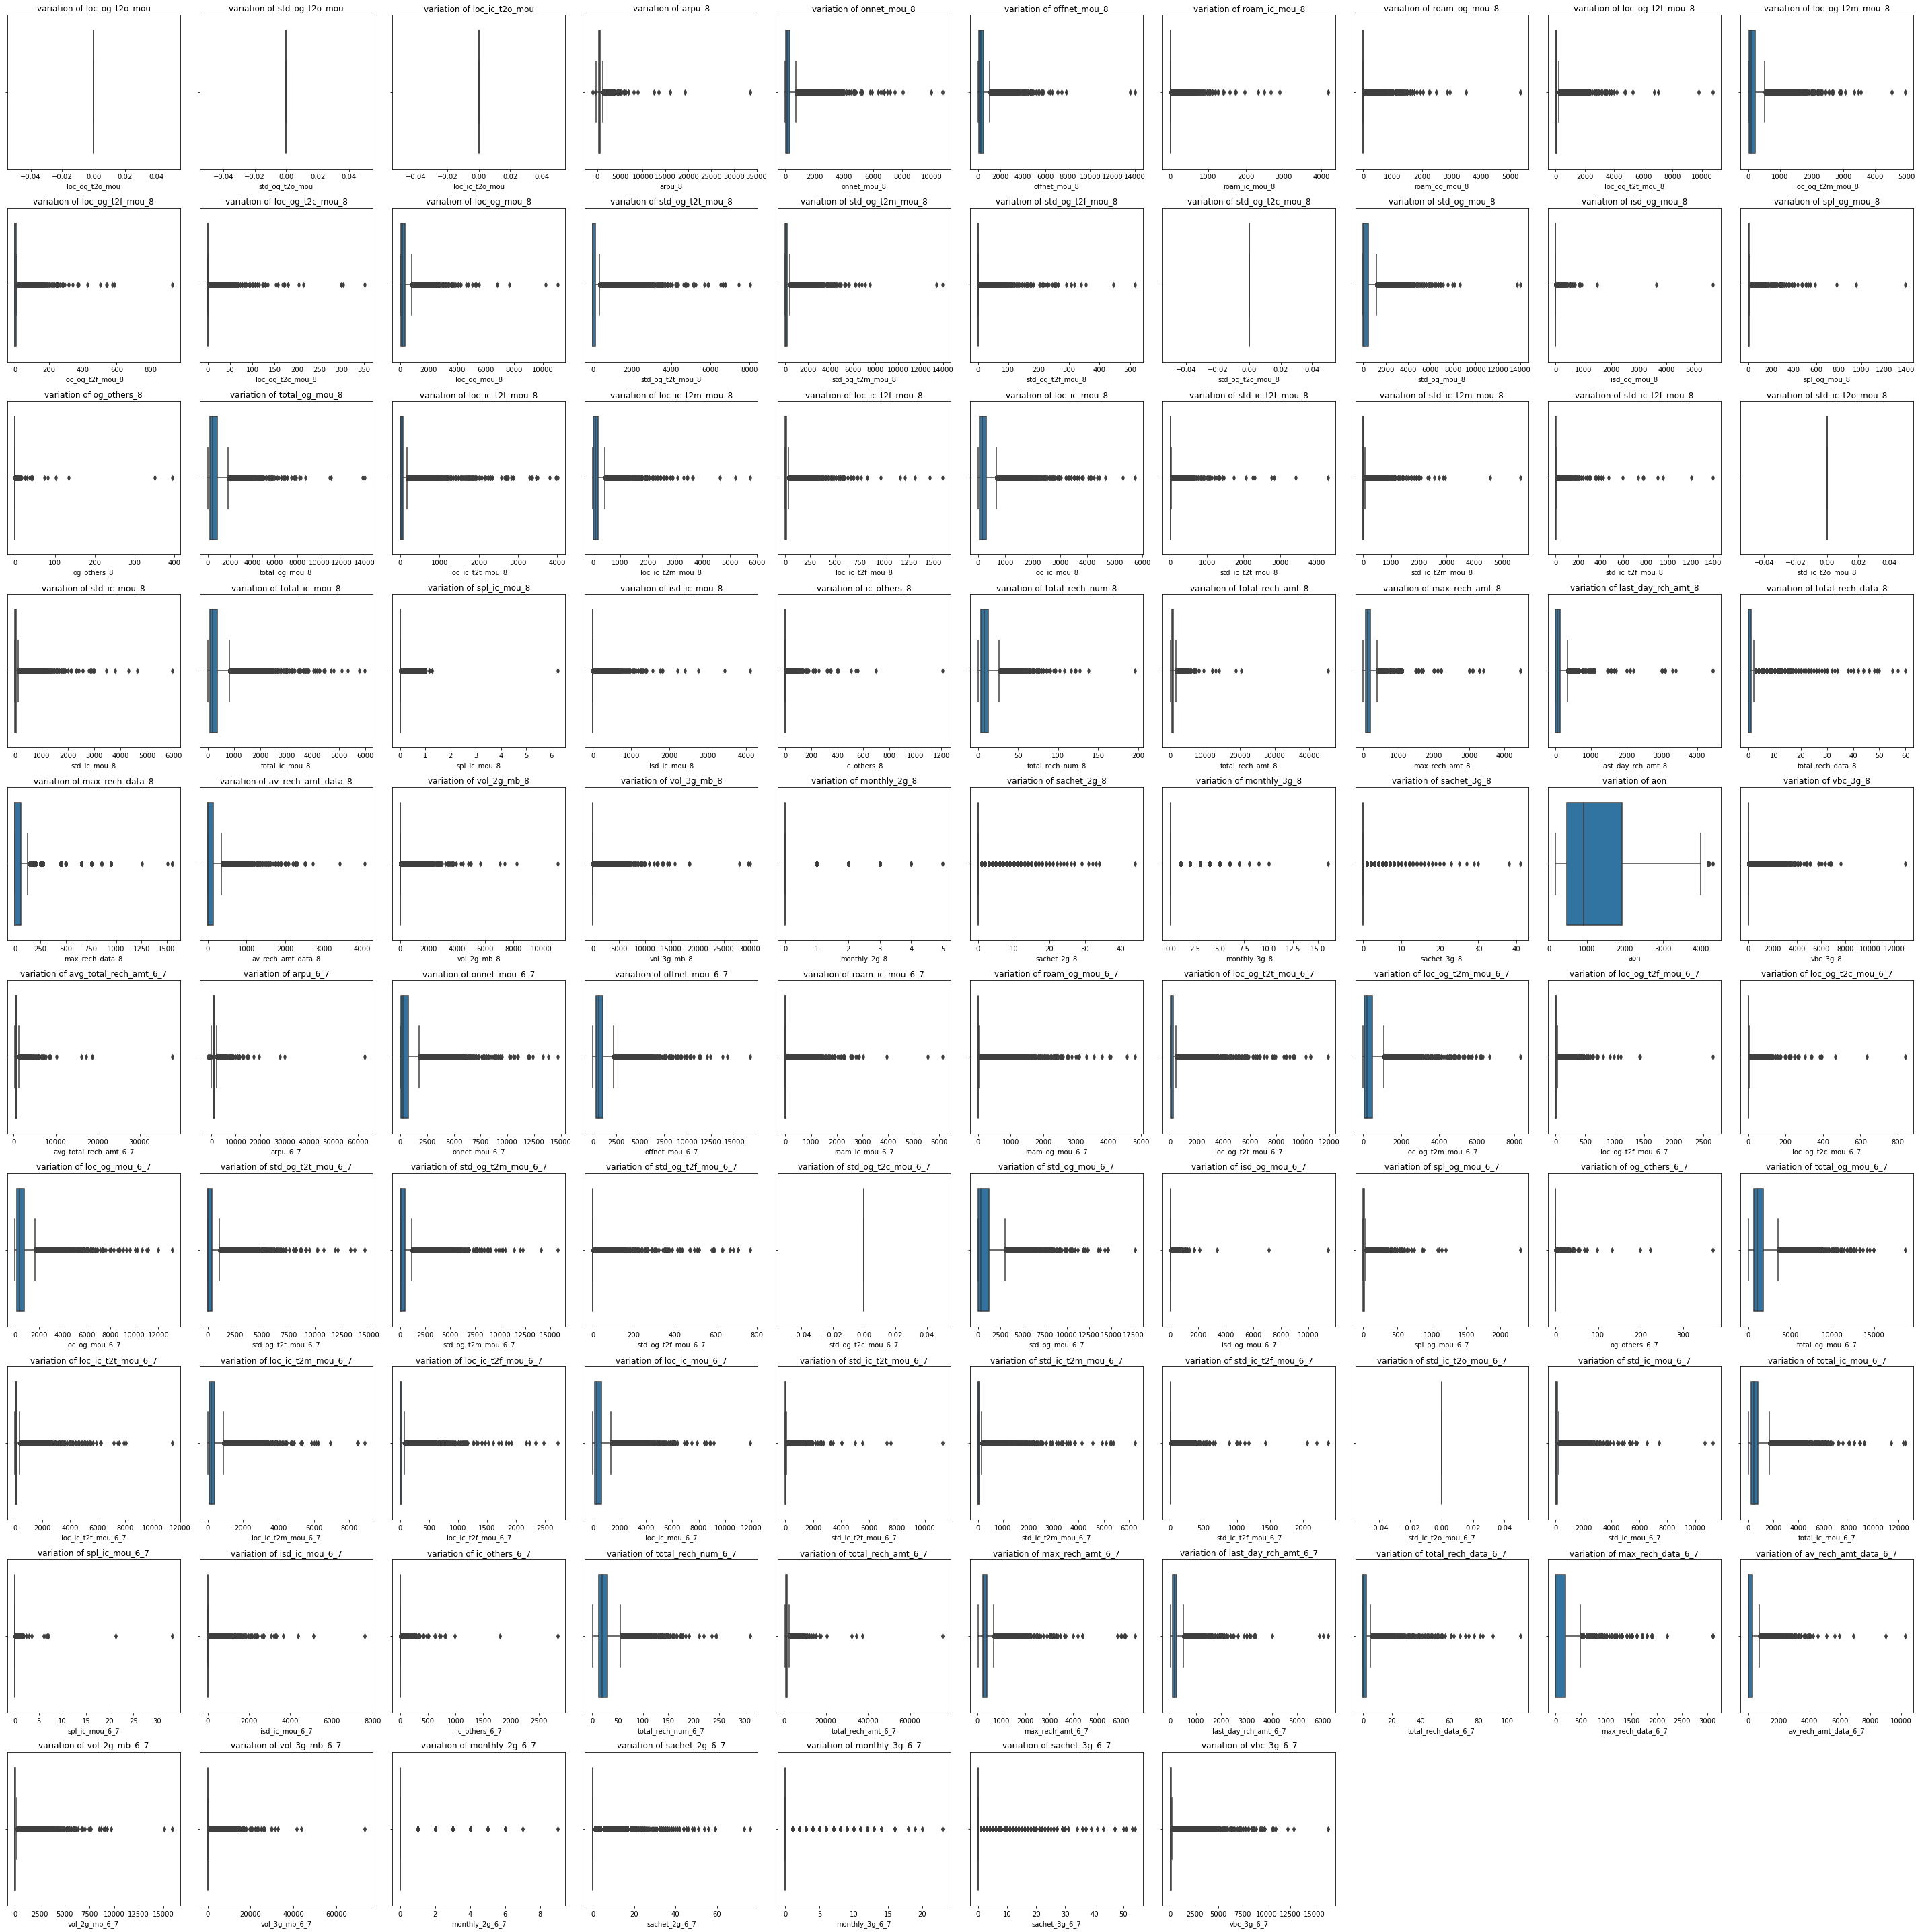

In [45]:
# plotting box plot to understand to spread of the variables
plt.figure(figsize= (40,40))
for index, column in enumerate(numerical_columns_list):
    plt.subplot(10,10,index+1)
    sns.boxplot(hvc_dataframe[column])
    plt.title('variation of '+column)
plt.tight_layout()
plt.show()

- From above box plots we can see that there exists extreme and mild outliers in each of the column as a result their distributions will be skewed. These outliers need to be treated in order to build an interpretable model. If not the model parameters obtained will not be reliable to make any inference. Let's look at the distributions of the numerical columns.

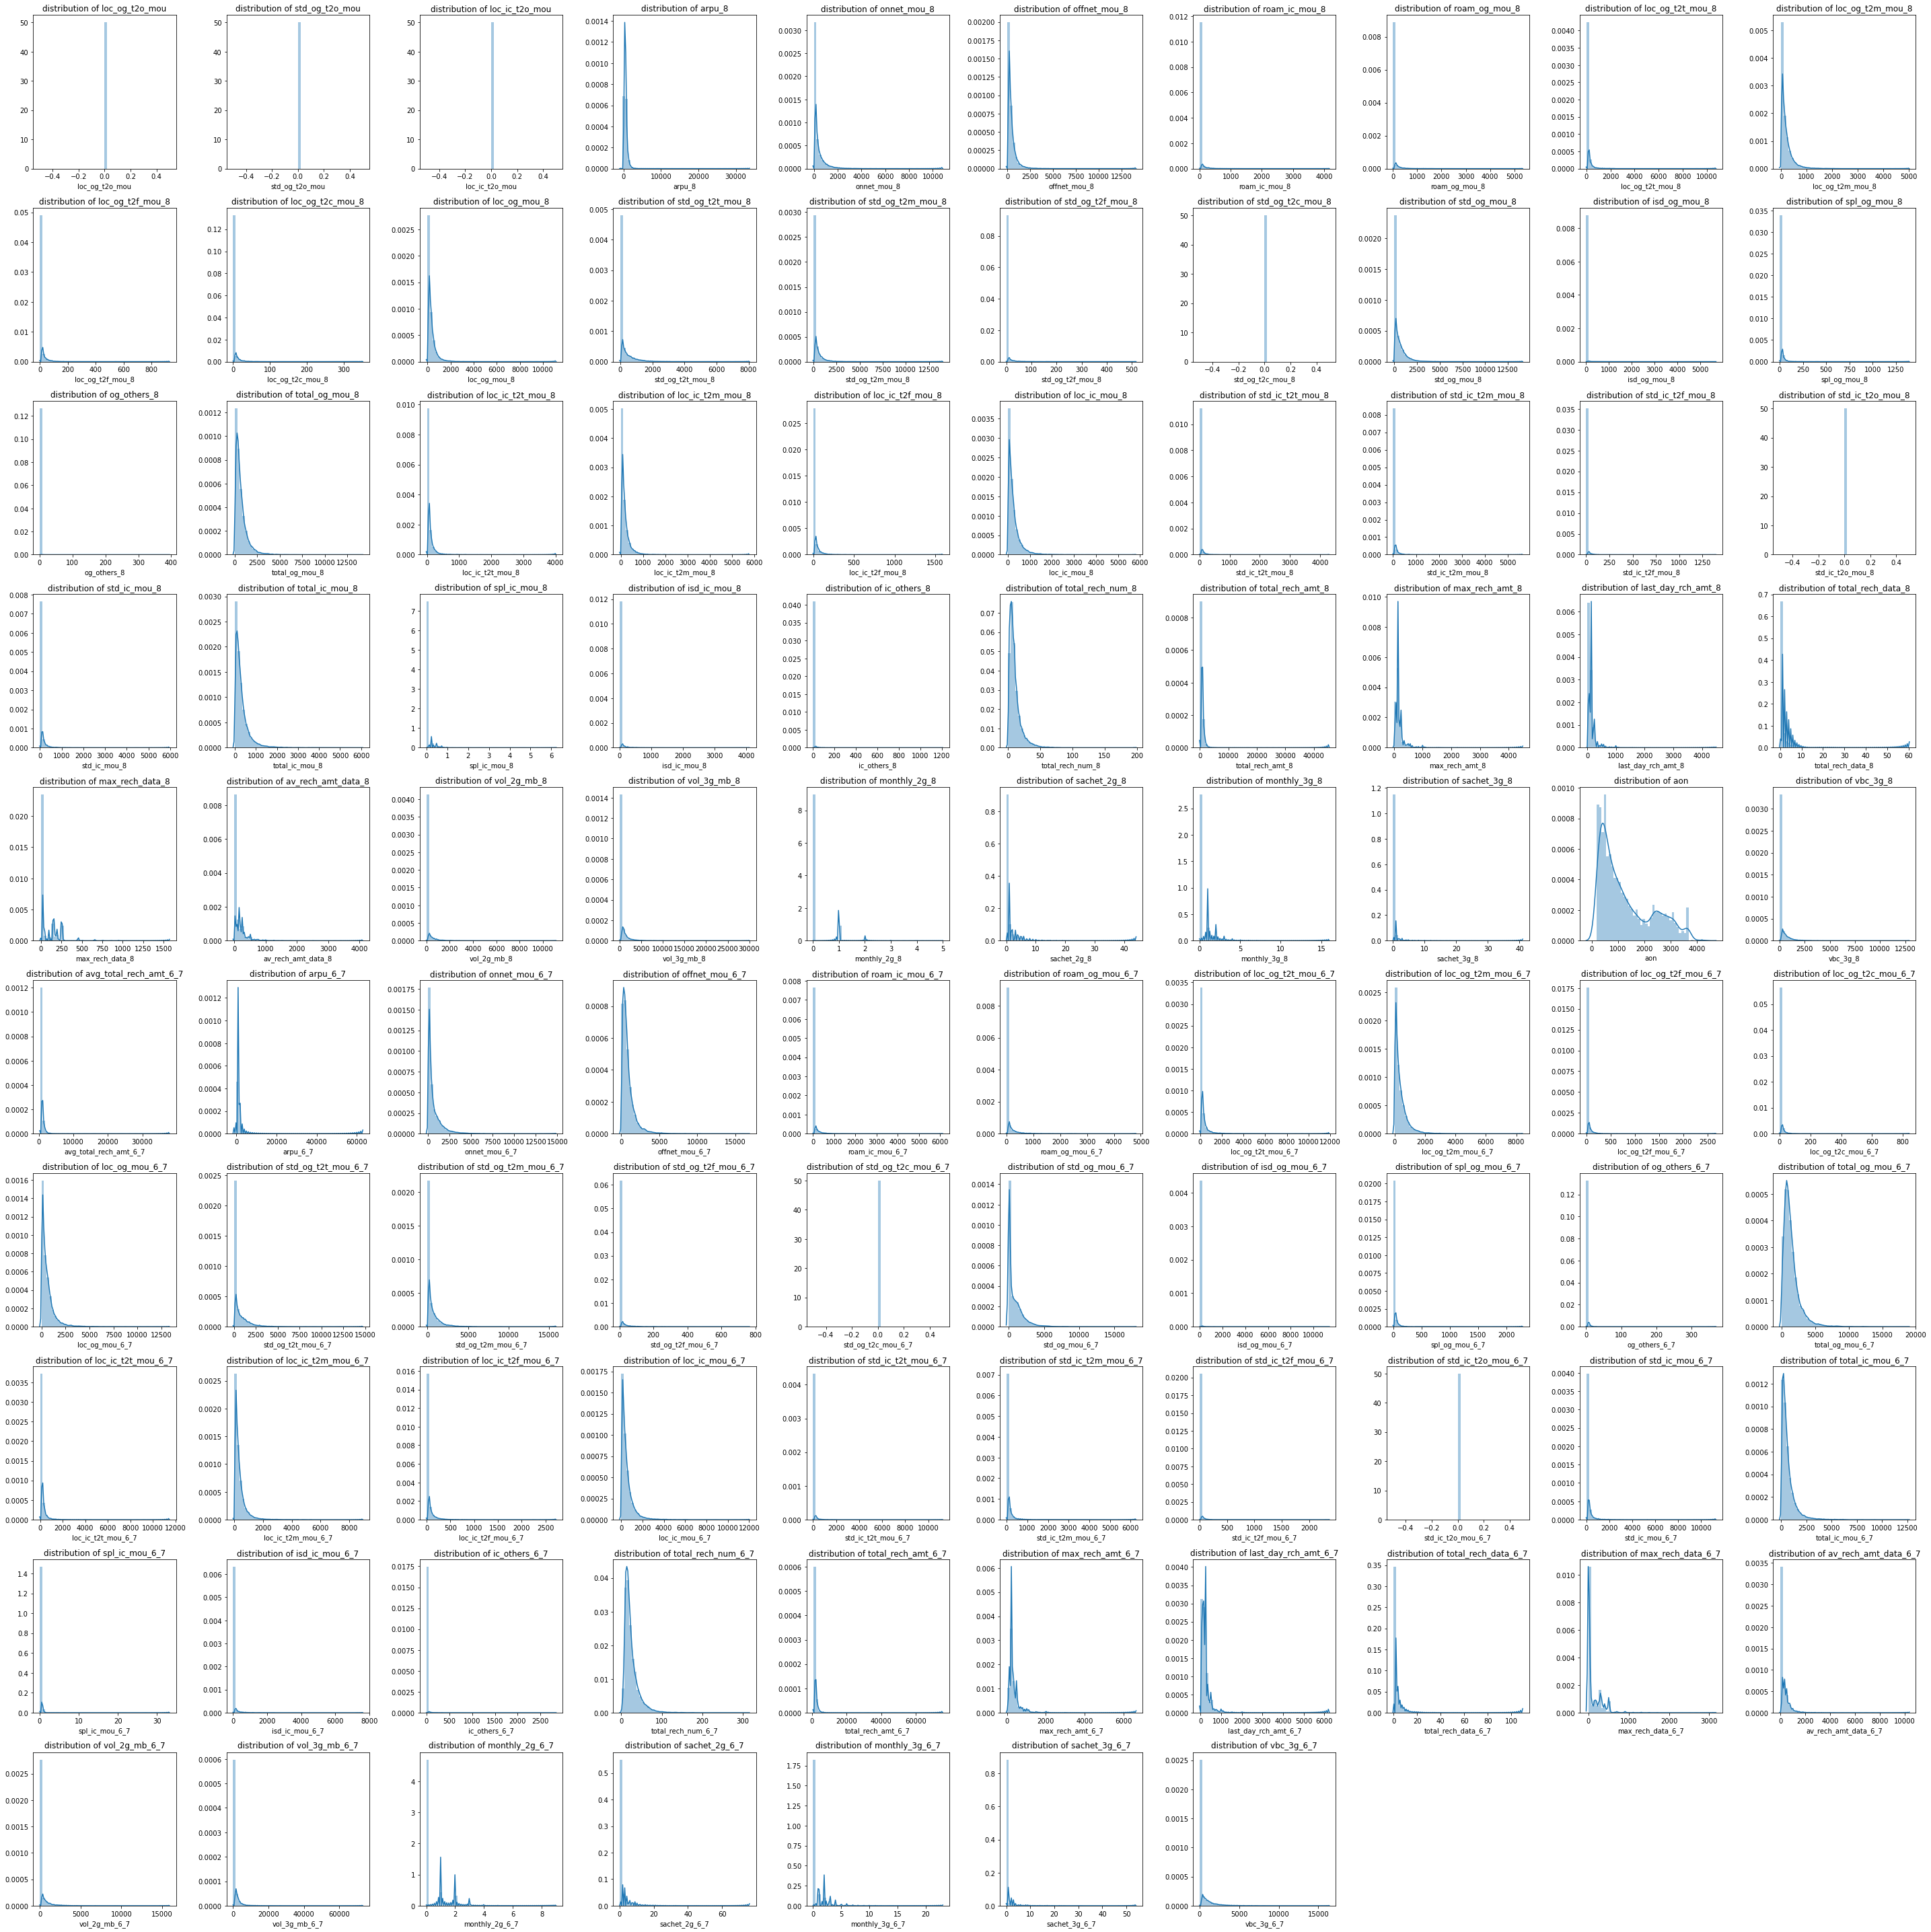

In [46]:
# plotting the distributions of numerical variables
plt.figure(figsize=(40,40))
for index,column in enumerate(numerical_columns_list):
    plt.subplot(10,10,index+1)
    sns.distplot(hvc_dataframe[column])
    plt.title('distribution of '+column)
plt.tight_layout()
plt.show()

- From above distributions we can see that most of the distributions are skewed to the right because of presence of mild and extreme outliers. In order to treat the outliers we can either perform transformation on these numerical columns or either perform outlier treatment methods like IQR, Standard deviation methods and Z-score methods. But in this case, since the distributions are skewed heavily we cannot be using standard deviation methods to treat the outliers. We may prefer performing any tweaked transforamtions or IQR methods.
- From above distributions we can see that there exists only single value in some columns. Let's not remove them manually. We allow the model to decide during model building.

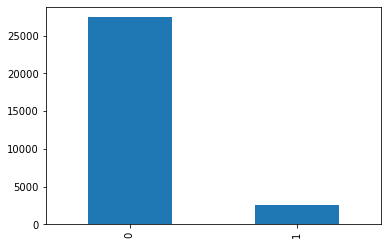

In [47]:
# checking the distribution of clas variables in target variable as well
hvc_dataframe['churn'].value_counts().plot.bar()
plt.show()

- From above bar plot we can see there exists more number of non churn cases rather than churn cases. This case is an highly data imbalance case which needs to be addressed before performing model building otherwise we will not be able to predict the churn cases at all properly. Later we perform some of the data imbalance treatment methods to treat data imbalance condition.

- Let's treat the outliers first and then proceed further for data visualization analysis.

## Outlier Treatment

- Since there exists zero and negative values along with the positive values in the columns we cannot be perform transformation directly. We need to tweak the transformations accordingly and then apply. For this problem we will proceed to apply IQR method by adjusting the inner and outer fence limits.

In [48]:
# capping the upper extreme outliers and lower mild outliers
for column in numerical_columns_list:
    q1 = hvc_dataframe[column].quantile(0.25)
    q3 = hvc_dataframe[column].quantile(0.75)
    IQR = q3-q1
    upper_limit = q3+3*IQR
    lower_limit = q1-1.5*IQR
    hvc_dataframe.loc[hvc_dataframe[column]> upper_limit, column] = upper_limit
    hvc_dataframe.loc[hvc_dataframe[column]< lower_limit, column] = lower_limit

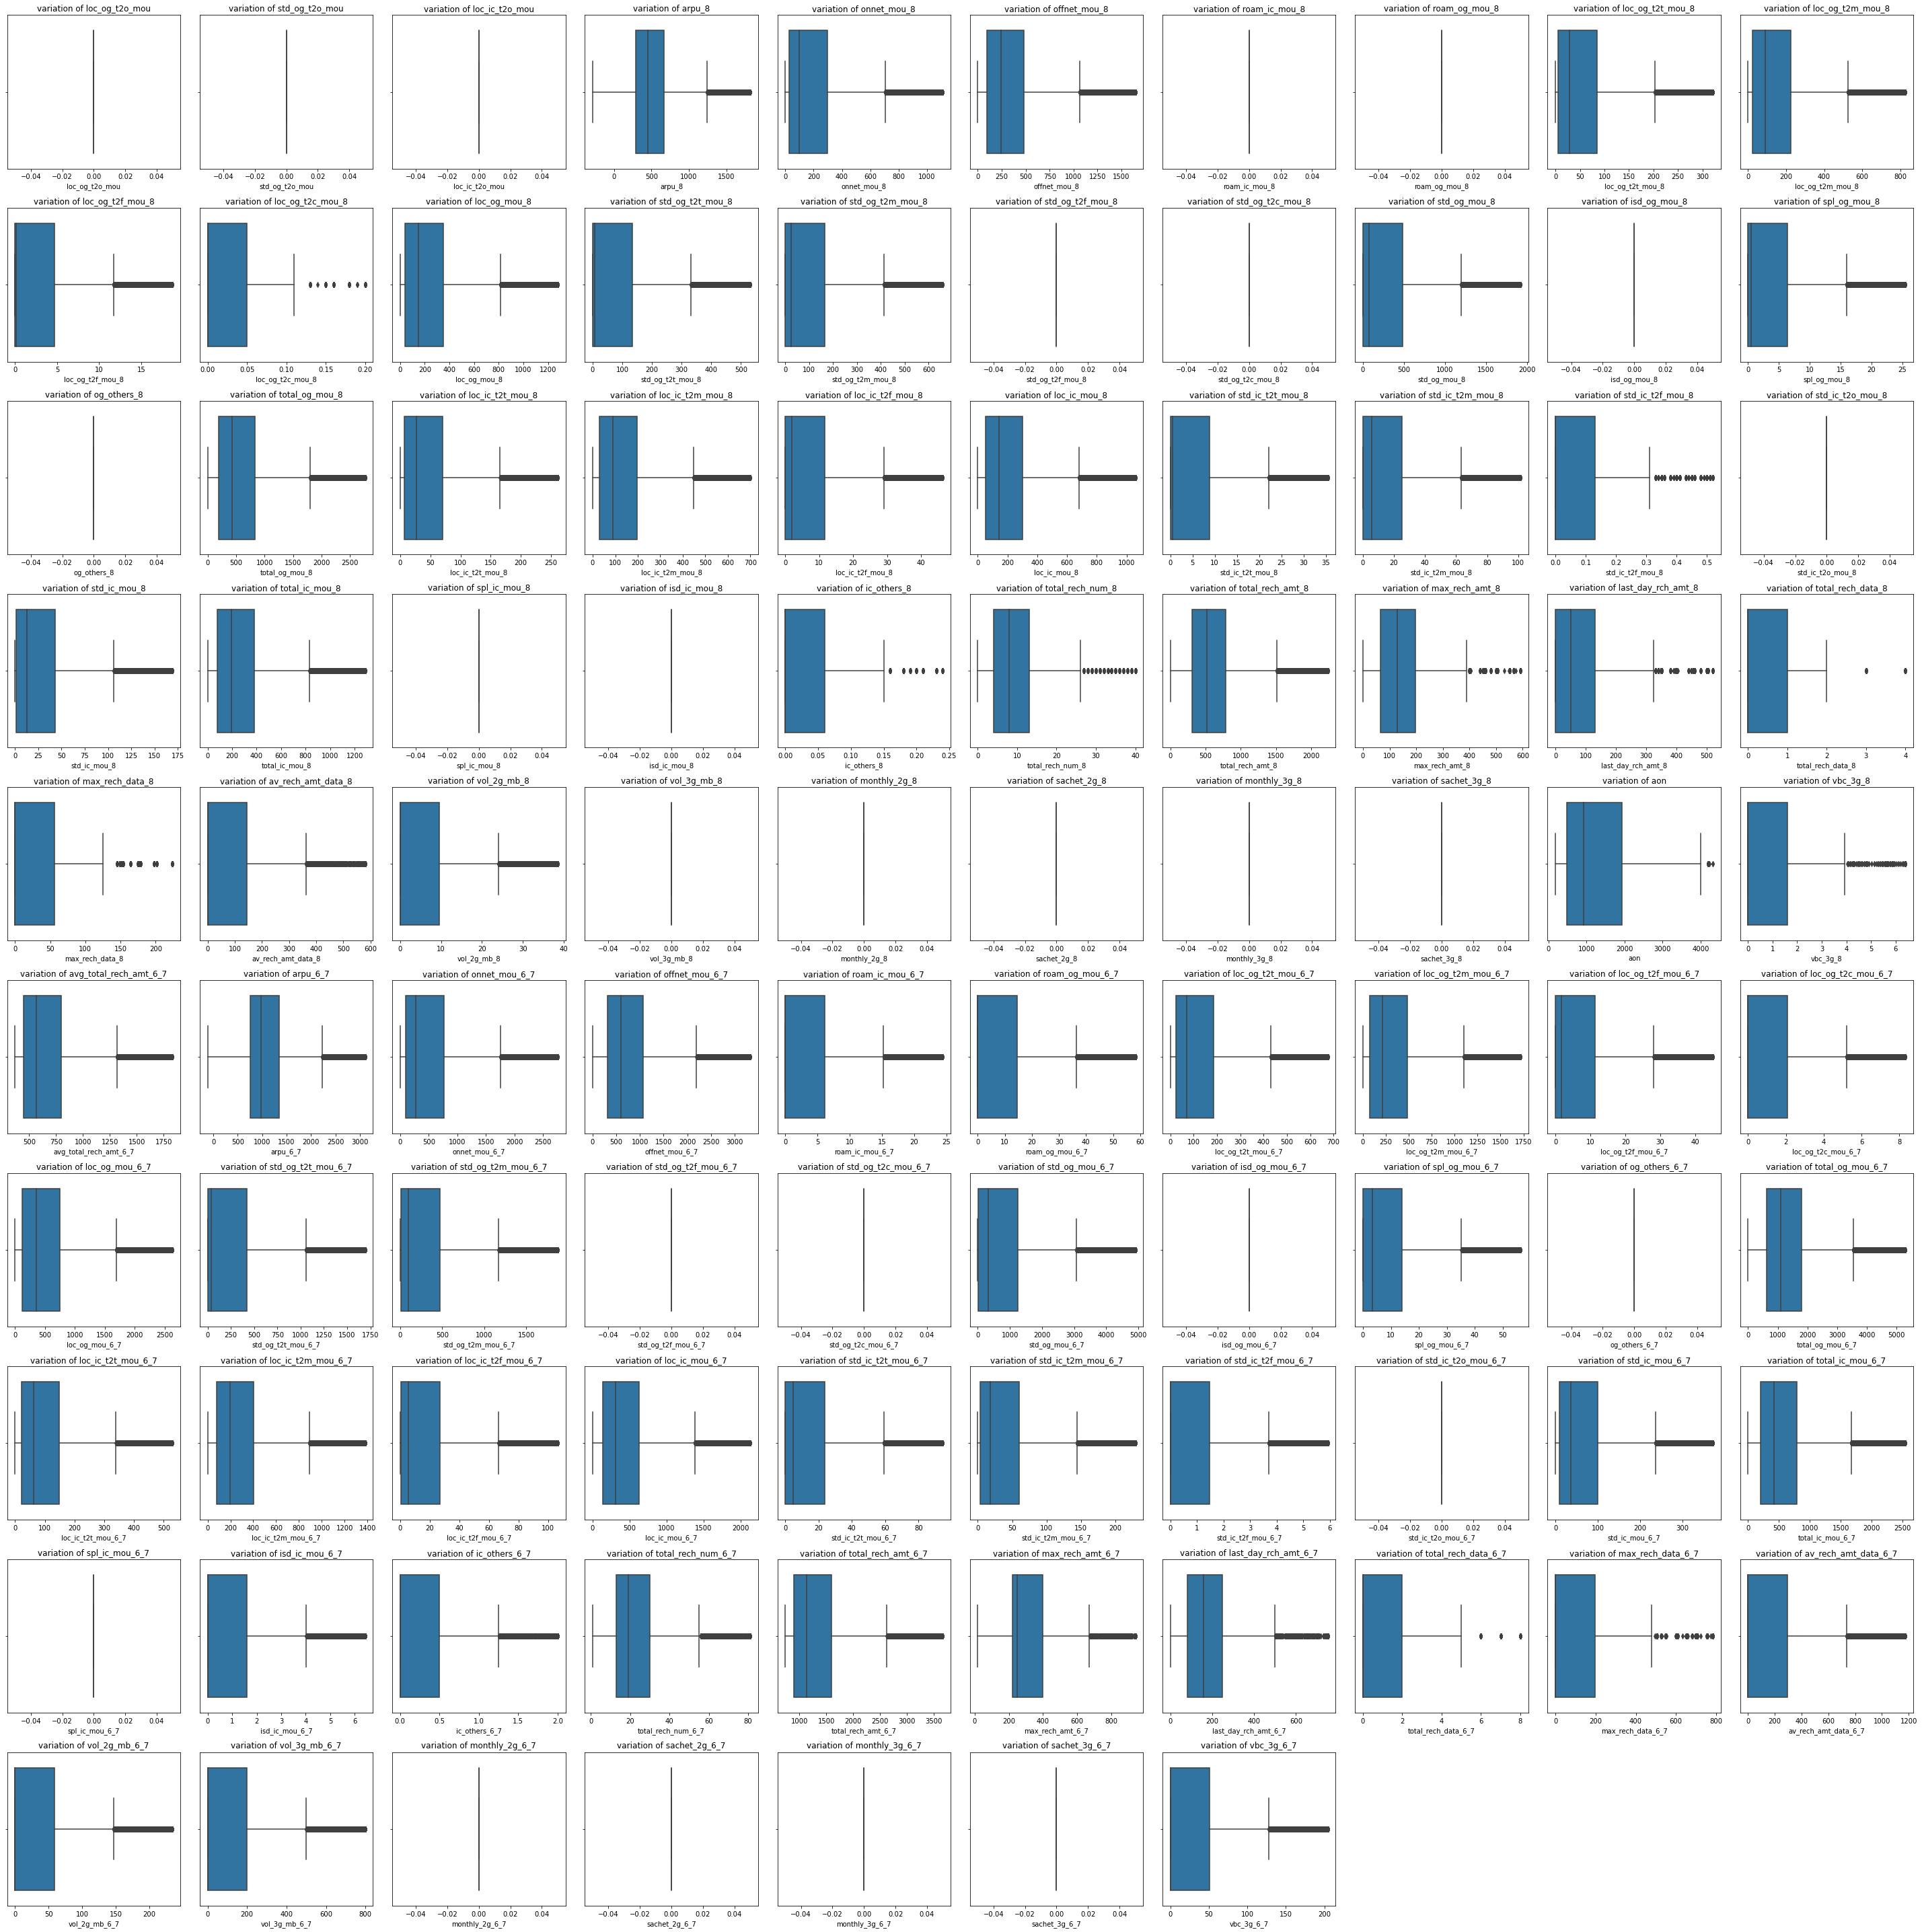

In [49]:
# plotting the boxplot and checking the distributions after treating the outliers using IQR method
plt.figure(figsize= (40,40))
for index, column in enumerate(numerical_columns_list):
    plt.subplot(10,10, index+1)
    sns.boxplot(hvc_dataframe[column])
    plt.title('variation of '+column)
plt.tight_layout()
plt.show()

- From above boxplots we can see that all the lower mild outliers and upper extreme outliers have been treated by performing capping in order to not to loose the information provided by the data points. Though there exists some upper mild outliers which are valid data points and are just some continous high values. During treating outliers not all outliers which are detected by the statistical methods needs to be removed. Upon data distribution and having some understanding out the occurance of large data points we need to take some action to treat.

### Bivariate Analysis

In [50]:
# converting the data type of churn column into object
hvc_dataframe['churn'] = hvc_dataframe['churn'].astype(object)

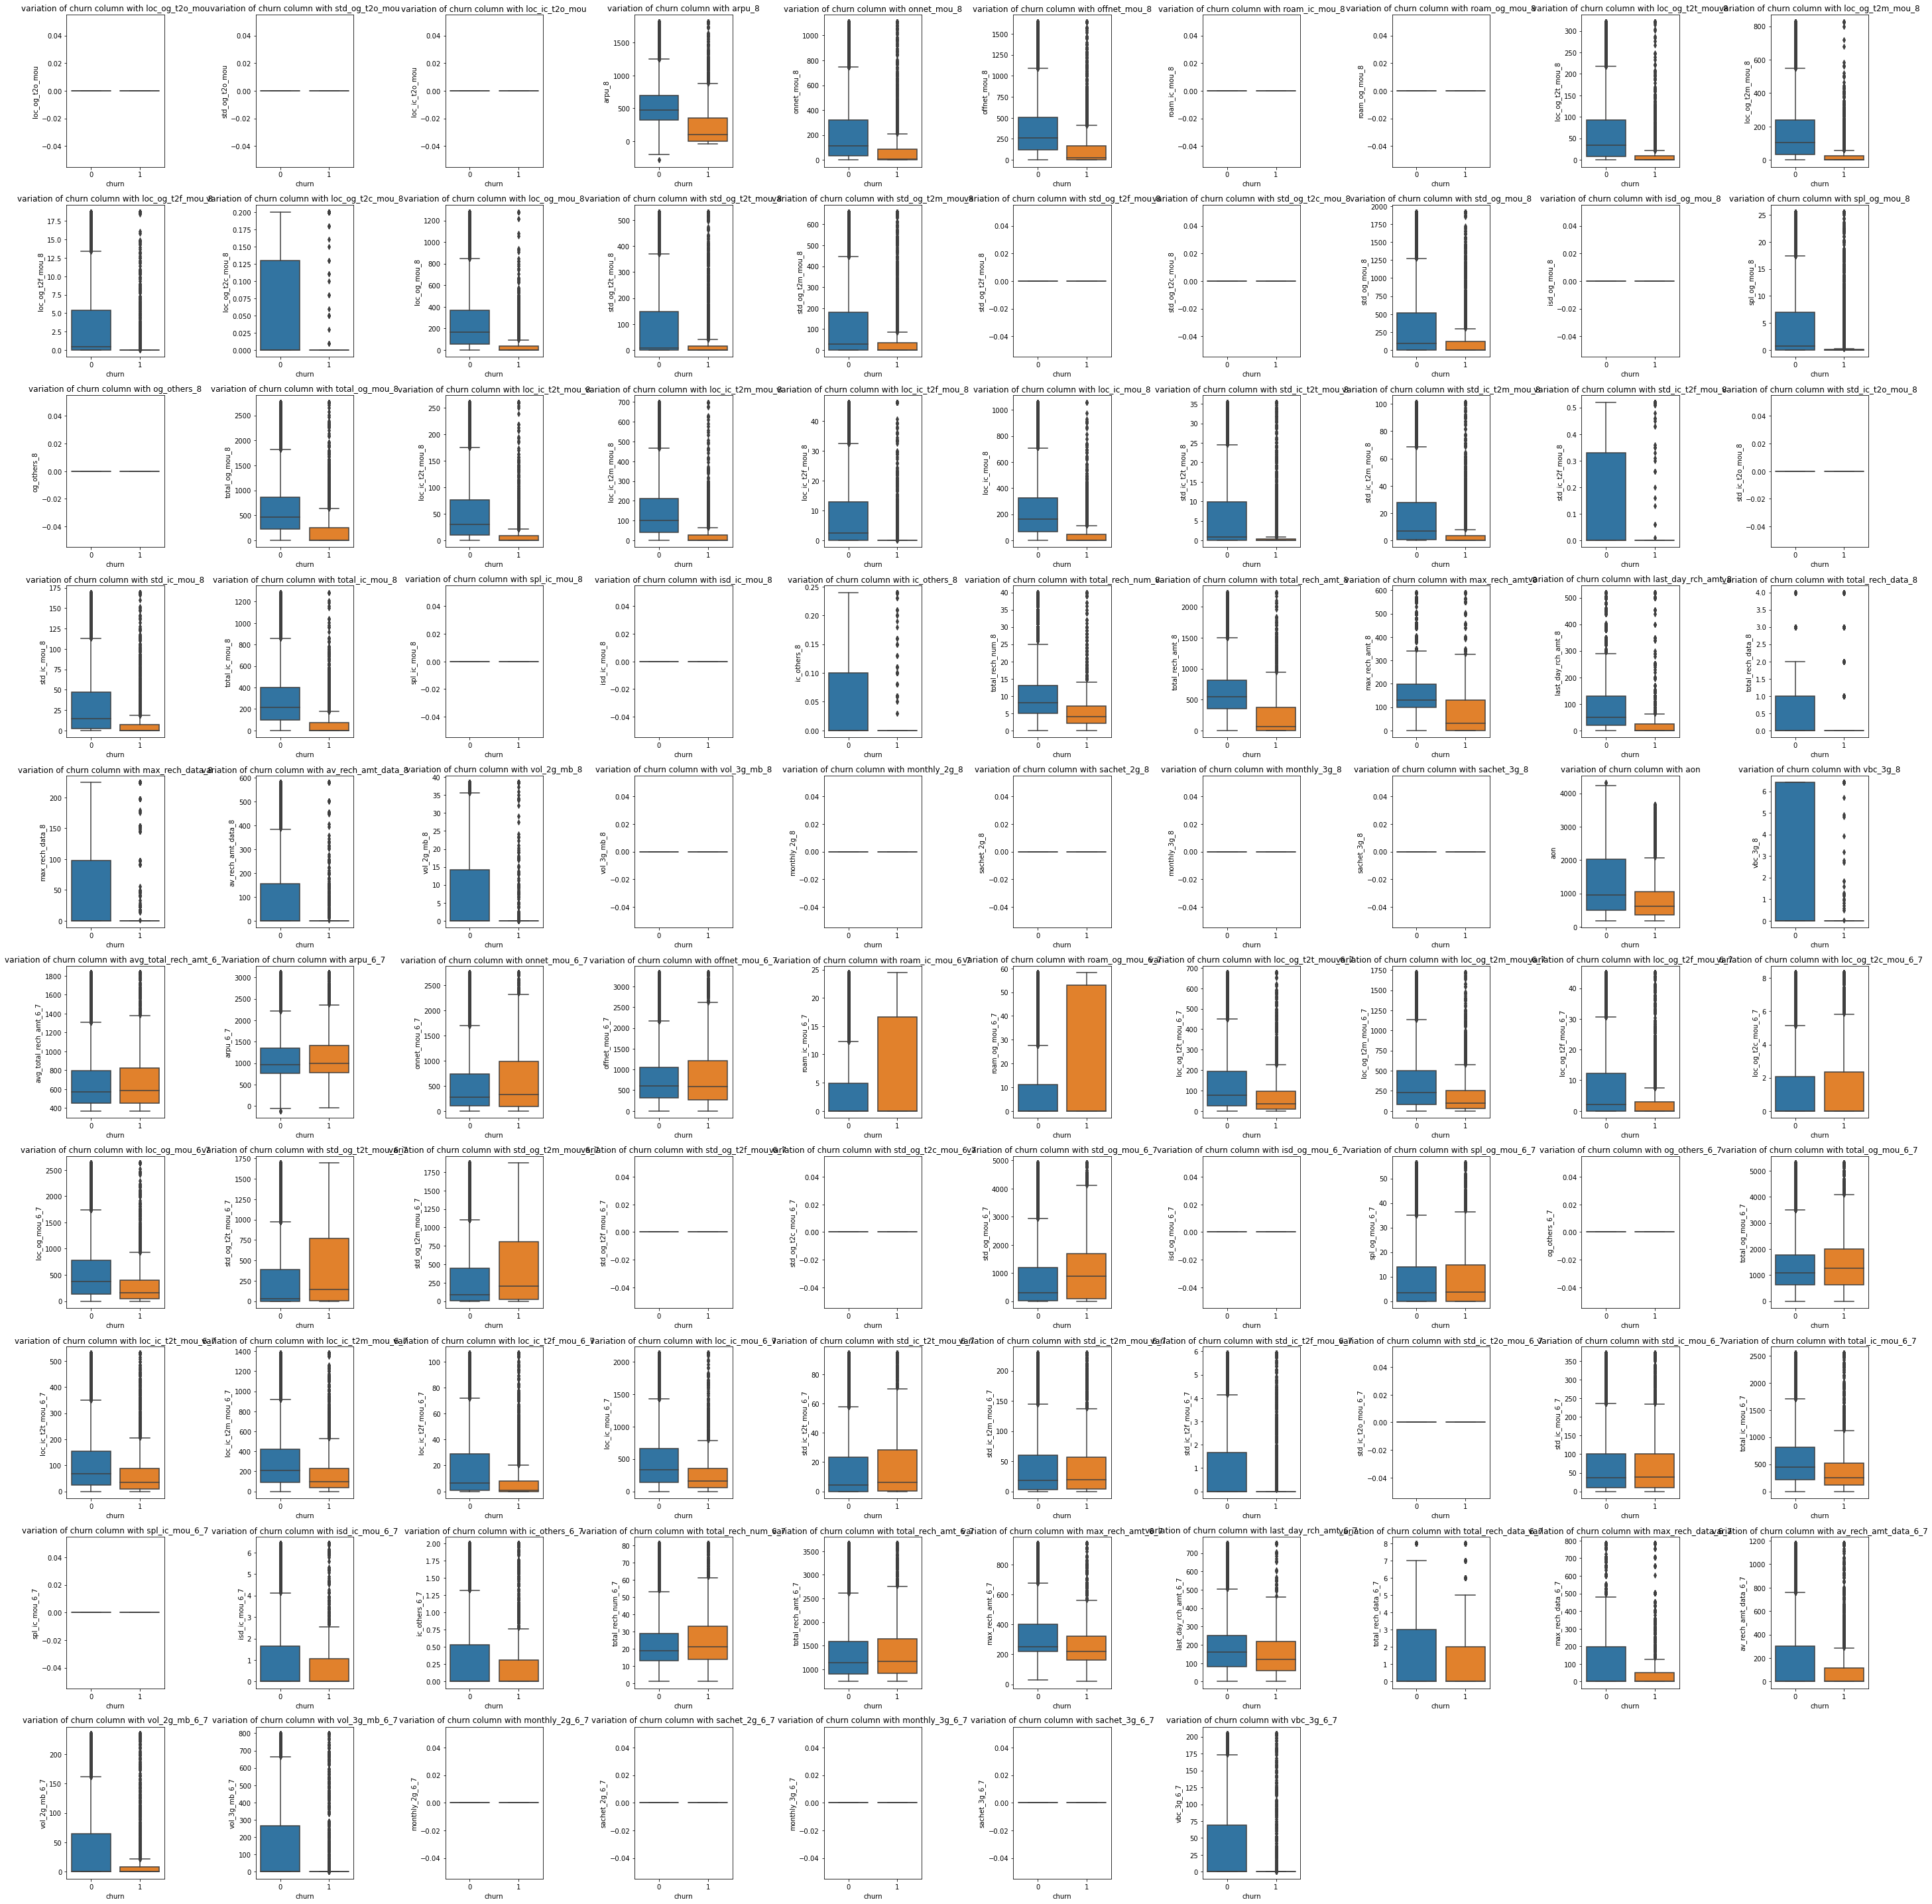

In [51]:
# analyzing the numerical variables in relation with target variable
plt.figure(figsize=(40,40))
for index, column in enumerate(numerical_columns_list):
    plt.subplot(10,10,index+1)
    sns.boxplot(hvc_dataframe['churn'], hvc_dataframe[column])
    plt.title('variation of churn column with '+column)
plt.tight_layout()
plt.show()

- Upon visualizing above box plots we can get to know the relation between target variabele and numerical columns present in the dataset in terms of which features or variables play significant role in churn cases. Since there are many variables we will look at the significant plots to draw some relational inference and are as follows:
    - churn cases have slightly greater median value of average total recharge amount made in good phase months. Also, there exists equivalently more variation for churn cases in average total recharge made in good phases.
    - Similarly churn cases have slight greater median value of average revenue generated per user in good phase months when compared to non churn cases. Also, there exists equivalent greater variation in churn cases for arpu of good phase months.
    - Churn cases have slight greater median value of onnet minutes of usage for good phase months compared to non churn cases. Also, the variation is higher in the upper quatile for churn cases comapred to non churn cases.
    - Churn cases have higher median value of std outgoing calls between same telecom networm provider during good phase months. Also, the variation is more in churn cases compared to non churn cases for std outgoining T2T calls.
    - Similarly, churn cases have higher variation and median value for std outgoing calls with other mobile network provider in good phase months.
    - Churn cases have low median value and less variation in local outgoing calls during action months that is 8th month. During this month the customer started expericing some issues in services or started having feeling that other serivce providers are offering better services at lower cost. Hence during these months churn customers have used limited services of current serivce provider. The same behvaiour can be found for all attributes during action month. The customer which showed such kind of behaviour were the ones which are utilized good amount of services during good phase months i.e. 6th and 7th months and were statisfied.

### Pair-wise correlations between numerical columns

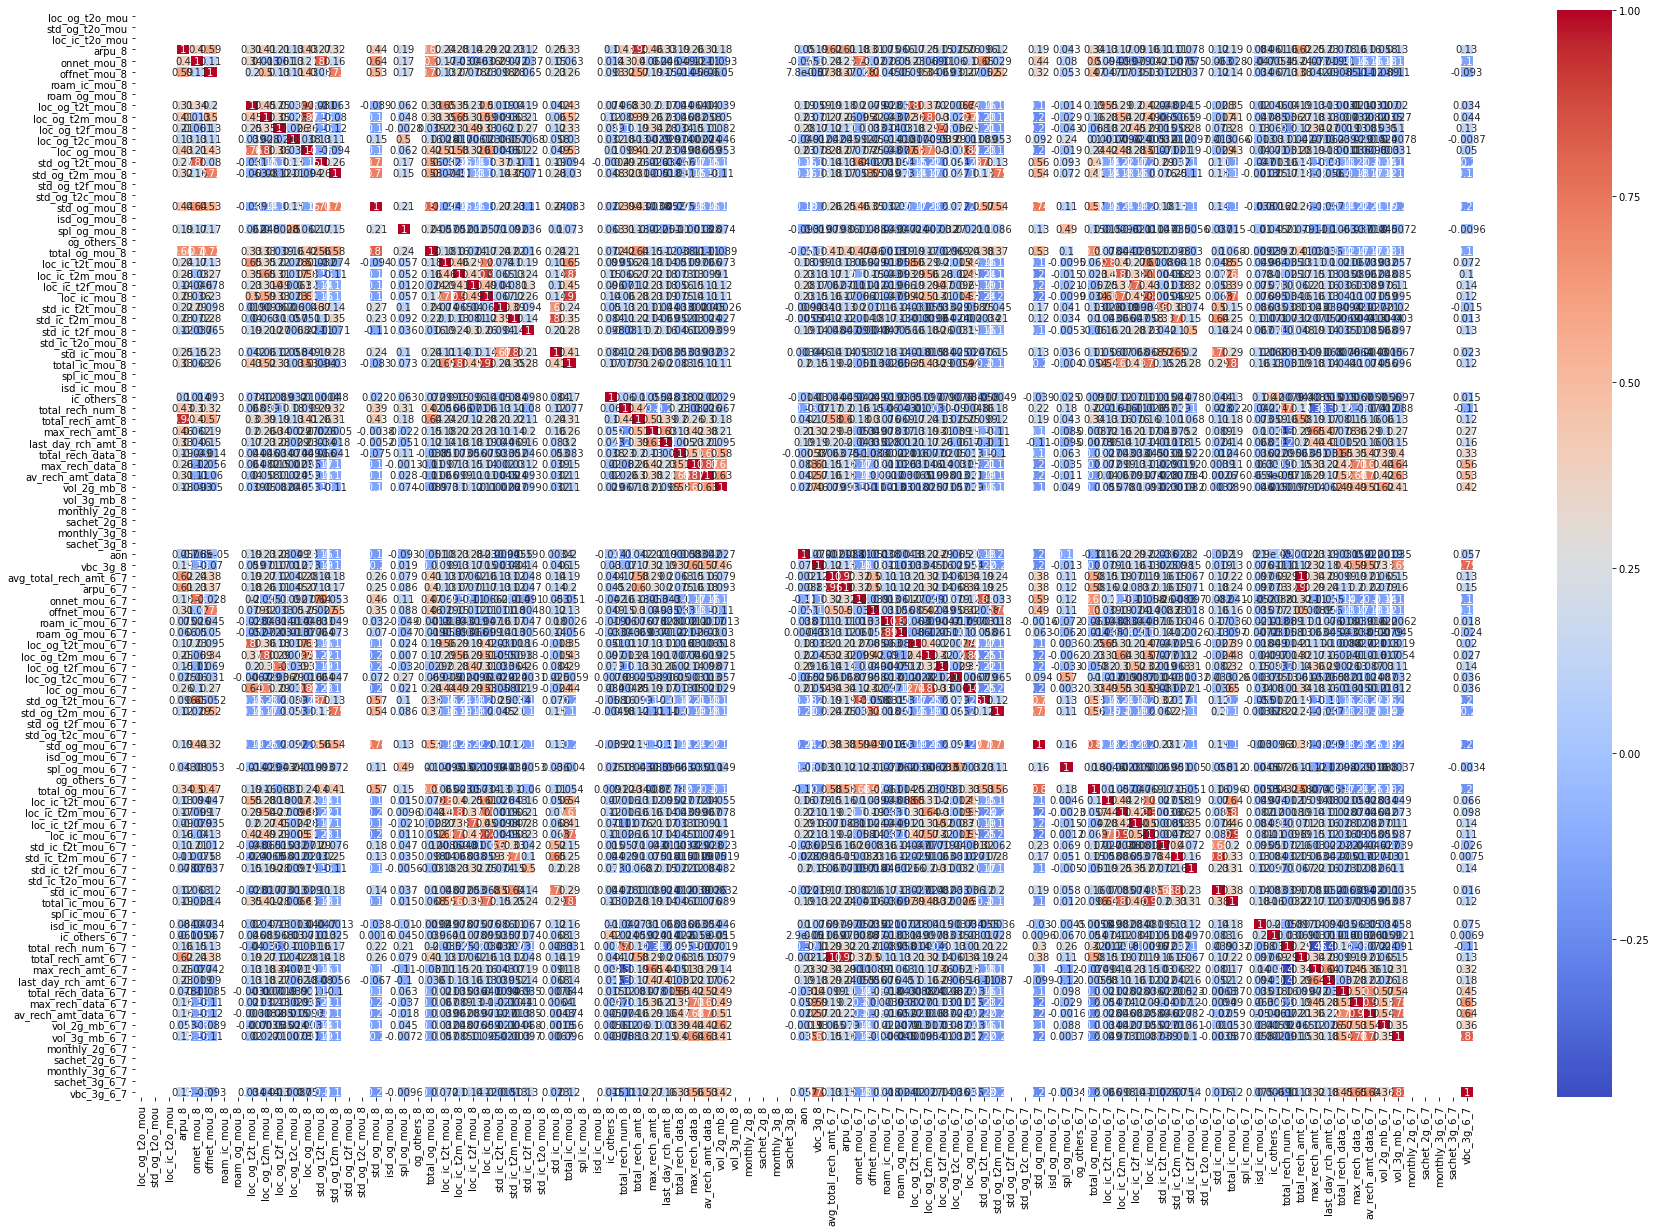

In [52]:
# plotting pair-wise correlations between numerical variables
corr_matrix = hvc_dataframe.drop('churn', axis =1).corr()
plt.figure(figsize= (30,20))
sns.heatmap(corr_matrix, cmap = 'coolwarm',annot= True, linecolor= 'white', linewidths= .5)
plt.show()

- Correlations plots will be best to identify the pair-wise correlations between numerical attributes. Upon observation we can remove strong correlated predictor variables otherwise it will be a problem during interpretable model building. Since the dimensionality of the data is huge the correlation plot will appear as cluttered plot. During model building we can perform techniques like RFE to help us by removing some multicollinear features. Duirng model building we can use some regularization methods to better address the multicollinearity issues in the data.

## Data Preprocessing

#### Treating the data imbalane using SMOTE

- As per SMOTE journal it was mentioned that it is better to perform first oversampling with some sampling strategy and then apply undersampling with some sampling strategy for better results. In this problem we will stick to perform just SMOTE in order to treat the data imbalance.

In [53]:
# Creating X and y variables from the dataframe
X = hvc_dataframe.drop('churn', axis=1)
y = hvc_dataframe['churn']

In [54]:
# converting the datatype of y back to int
y = y.astype(int)
y.dtype

dtype('int32')

In [55]:
# defining the SMOTE object with default hyparameters
oversample = SMOTE(random_state=100)
# fitting and resampling the data
X_trans, y_trans = oversample.fit_resample(X,y)

In [56]:
# converting X and y back into dataframe using the transformed values
hvc_trans_df = pd.concat([X_trans, y_trans], axis = 1)
# checking the head of the dataframe
hvc_trans_df.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou     arpu_8  onnet_mou_8  \
0         0.00000         0.00000         0.00000 1815.77150     52.29000   
1         0.00000         0.00000         0.00000  137.36200     35.08000   
2         0.00000         0.00000         0.00000  593.26000    534.24000   
3         0.00000         0.00000         0.00000  187.89400     70.61000   
4         0.00000         0.00000         0.00000   25.49900      7.79000   

   offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
0     325.91000        0.00000        0.00000          40.28000   
1     136.48000        0.00000        0.00000          12.49000   
2     482.46000        0.00000        0.00000          36.01000   
3     162.76000        0.00000        0.00000          67.38000   
4       5.54000        0.00000        0.00000           0.00000   

   loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0         162.28000          18.72000           0.00000     255.79000   
1          50.54000           0.00000           0.20000      63.04000   
2         294.46000          18.72000           0.20000     353.99000   
3         128.28000          10.26000           0.00000     205.93000   
4           0.00000           0.00000           0.00000       0.00000   

   std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_t2c_mou_8  \
0          12.01000          49.14000           0.00000           0.00000   
1          22.58000          75.69000           0.00000           0.00000   
2         498.23000         156.94000           0.00000           0.00000   
3           3.23000          18.29000           0.00000           0.00000   
4           0.00000           0.00000           0.00000           0.00000   

   std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0      77.84000       0.00000       6.50000      0.00000       350.16000   
1      98.28000       0.00000      10.23000      0.00000       171.56000   
2     655.18000       0.00000       4.78000      0.00000      1015.26000   
3      21.53000       0.00000       5.91000      0.00000       233.38000   
4       0.00000       0.00000       0.00000      0.00000         0.00000   

   loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0          27.31000         121.19000          39.53000     188.04000   
1           0.31000          15.48000           0.00000      15.79000   
2          52.58000         195.18000           7.49000     255.26000   
3          28.89000         150.16000          32.71000     211.78000   
4           0.00000           0.00000           0.00000       0.00000   

   std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  \
0          30.39000         101.32000           0.52000           0.00000   
1           0.10000           0.65000           0.00000           0.00000   
2          35.44000         101.32000           0.52000           0.00000   
3           6.33000          73.93000           0.52000           0.00000   
4           0.00000           0.00000           0.00000           0.00000   

   std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0     169.35000       428.74000       0.00000       0.00000      0.24000   
1       0.75000        16.54000       0.00000       0.00000      0.00000   
2     169.35000      1144.53000       0.00000       0.00000      0.24000   
3      82.44000       294.46000       0.00000       0.00000      0.00000   
4       0.00000         0.00000       0.00000       0.00000      0.00000   

   total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
0           7.00000        2233.00000       591.00000           520.00000   
1          14.00000         120.00000        30.00000            10.00000   
2          11.00000         717.00000       130.00000             0.00000   
3           2.00000         160.00000       130.00000           130.00000   
4           4.00000          30.00

In [57]:
# checking the shape of the hvc_trans_df
hvc_trans_df.shape

(54836, 98)

- From above shape we can see that new synthetic samples have been augmented into the data so as to make class balance of the target variable

In [58]:
# checking the class imbalance after SMOTE treatment
hvc_trans_df['churn'].value_counts(normalize = True)*100

1   50.00000
0   50.00000
Name: churn, dtype: float64

- From above we can see that the class labels have been made equal without any loss of existing information from majority class label data.

#### Splitting the data into train and test

- The split of the data into train and test is made in such a way that there exists equal class proportions in both train and test splits. If performed normal train and test split for an unbalanced class distribution data, it will randomly sample the data points into train and test as per mentioned proportion of split not taking into consideration of existsing class proportions and thereby upon building model on such train and test data the model will be trained on completely different proportion of class data as a result the performance of the model on tets and validation set will be poor.
- Though we have handled data imbalance in this case, upon performing normal train and test split will not affect our model building. But still we prefer to have a stratified split.

In [59]:
# creating X and y from transformed data
X = hvc_trans_df.drop('churn', axis =1)
y = hvc_trans_df['churn']

In [60]:
# performing stratified train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.70, test_size=0.30, random_state=100, stratify = y)

In [61]:
# checking X_train and X_test shapes
X_train.shape, X_test.shape

((38385, 97), (16451, 97))

In [62]:
# checking the class composition on both train and test samples
print(y_train.value_counts(normalize=True)*100)
print('-'*10)
print(y_test.value_counts(normalize=True)*100)

1   50.00130
0   49.99870
Name: churn, dtype: float64
----------
0   50.00304
1   49.99696
Name: churn, dtype: float64


- From above we can see that there exists equal class distribution of target variable in both train and test.

#### Scaling of train and test

In [63]:
# defining scaler object
scaler = StandardScaler()
# sacling the train data
X_train[:] = scaler.fit_transform(X_train)
# scaling test data
X_test[:] = scaler.transform(X_test)

In [64]:
# checking the head of X_train after scaling
X_train.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_8  onnet_mou_8  \
46787         0.00000         0.00000         0.00000  1.66151     -0.23428   
22993         0.00000         0.00000         0.00000 -0.18935     -0.23378   
40034         0.00000         0.00000         0.00000  0.06737     -0.61587   
30508         0.00000         0.00000         0.00000 -0.30855     -0.62324   
23552         0.00000         0.00000         0.00000  3.85755      3.39876   

       offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
46787       1.56255        0.00000        0.00000          -0.55768   
22993      -0.13053        0.00000        0.00000           0.16963   
40034      -0.67697        0.00000        0.00000          -0.53475   
30508      -0.50059        0.00000        0.00000          -0.56415   
23552       1.41108        0.00000        0.00000          -0.38597   

       loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
46787          -0.61364          -0.46385           2.16451      -0.62439   
22993          -0.41769           3.21519          -0.51561      -0.10880   
40034          -0.52723          -0.47206           1.63831      -0.56141   
30508          -0.60225          -0.47206          -0.51561      -0.61904   
23552          -0.09912          -0.35191          -0.51561      -0.23592   

       std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_t2c_mou_8  \
46787          -0.51899          -0.54044           0.00000           0.00000   
22993          -0.18835           0.18609           0.00000           0.00000   
40034          -0.52062          -0.53703           0.00000           0.00000   
30508          -0.52062          -0.53293           0.00000           0.00000   
23552           2.75382           2.98414           0.00000           0.00000   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
46787      -0.56242       0.00000      -0.51418      0.00000        -0.75945   
22993      -0.13458       0.00000      -0.53684      0.00000        -0.19190   
40034      -0.56296       0.00000      -0.50524      0.00000        -0.73203   
30508      -0.56123       0.00000      -0.53684      0.00000        -0.75683   
23552       3.82320       0.00000      -0.52921      0.00000         4.22509   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
46787          -0.59459          -0.64622          -0.49094      -0.66311   
22993           0.04963          -0.13592           3.38728       0.32279   
40034          -0.55024          -0.54013          -0.42034      -0.57665   
30508          -0.59939          -0.64134          -0.49692      -0.66150   
23552          -0.38358          -0.12574          -0.27853      -0.24828   

       std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  \
46787          -0.50697          -0.53185          -0.44522           0.00000   
22993          -0.38384          -0.07209           2.44625           0.00000   
40034          -0.52009          -0.51114          -0.44576           0.00000   
30508          -0.52009          -0.20408          -0.44576           0.00000   
23552          -0.21686          -0.35158          -0.44576           0.00000   

       std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
46787      -0.56208        -0.69706       0.00000       0.00000     -0.42943   
22993       3.62735         0.91519       0.00000       0.00000     -0.45805   
40034      -0.55252        -0.62965       0.00000       0.00000     -0.20819   
30508      -0.36363        -0.66992       0.00000       0.00000     -0.45805   
23552      -0.38093        -0.33097       0.00000       0.00000     -0.45805   

       total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
46787           0.79833           2.56551         1.10770            -0.64962   
22993          -0.90997          -0.52474         0.68291             1.45409   


In [65]:
# creating a copy of each train and test dataset for further high performance model building
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

## Model Building - Interpretable Model

- Building Logistic Regression as it is one of the simplest model and good interpretable model.
- Since we are building Interpretable model we need to make sure that we handle multicollinearity in the model otherwise the model parameters will not be reliable to make any inferences as they will be widely swinging. Since there exists many features first we perform automated feature selection method using RFE which tries to elimiate some multicollinearity between features and then performing manual feature elimiation to eliminate some insignificant features and multicollinear features by checking VIF values.

#### Performing RFE for automated feature elimination

In [66]:
# defining the logistic regression model object to pass into RFE
logreg = LogisticRegression(random_state= 100)
# fitting the data on top of the model object
logreg.fit(X_train, y_train)

LogisticRegression(random_state=100)

In [67]:
# building RFE model object considering 15 top features
rfe_tune_model = RFE(logreg, n_features_to_select= 15)
# fitting the data on top of the model object
rfe_tune_model.fit(X_train, y_train)

RFE(estimator=LogisticRegression(random_state=100), n_features_to_select=15)

In [68]:
# checking the top 15 features resulted by rfe model
list(zip(X_train.columns, rfe_tune_model.support_, rfe_tune_model.ranking_))

[('loc_og_t2o_mou', False, 83),
 ('std_og_t2o_mou', False, 82),
 ('loc_ic_t2o_mou', False, 81),
 ('arpu_8', False, 3),
 ('onnet_mou_8', False, 30),
 ('offnet_mou_8', False, 46),
 ('roam_ic_mou_8', False, 62),
 ('roam_og_mou_8', False, 57),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', False, 22),
 ('loc_og_t2c_mou_8', False, 31),
 ('loc_og_mou_8', False, 13),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_8', False, 10),
 ('std_og_t2f_mou_8', False, 67),
 ('std_og_t2c_mou_8', False, 72),
 ('std_og_mou_8', False, 12),
 ('isd_og_mou_8', False, 61),
 ('spl_og_mou_8', False, 50),
 ('og_others_8', False, 78),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2t_mou_8', False, 19),
 ('std_ic_t2m_mou_8', False, 14),
 ('std_ic_t2f_mou_8', False, 16),
 ('std_ic_t2o_mou_8', False, 59),
 ('std_ic_mou_8', False, 45),
 ('total_ic_mou_8', True,

- From above zip list we can see which features have been selected and what ranking has been assigned to each of the feature.

In [69]:
# selecting the top 15 features provided by RFE and transforming X_train
X_train = X_train[list(X_train.columns[rfe_tune_model.support_])]
# checking X_train
X_train.head()

loc_og_t2t_mou_8  loc_og_t2m_mou_8  std_og_t2t_mou_8  total_og_mou_8  \
46787          -0.55768          -0.61364          -0.51899        -0.75945   
22993           0.16963          -0.41769          -0.18835        -0.19190   
40034          -0.53475          -0.52723          -0.52062        -0.73203   
30508          -0.56415          -0.60225          -0.52062        -0.75683   
23552          -0.38597          -0.09912           2.75382         4.22509   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
46787          -0.59459          -0.64622          -0.49094      -0.66311   
22993           0.04963          -0.13592           3.38728       0.32279   
40034          -0.55024          -0.54013          -0.42034      -0.57665   
30508          -0.59939          -0.64134          -0.49692      -0.66150   
23552          -0.38358          -0.12574          -0.27853      -0.24828   

       total_ic_mou_8  total_rech_num_8  last_day_rch_amt_8  max_rech_data_8  \
46787        -0.69706           0.79833            -0.64962         -0.47167   
22993         0.91519          -0.90997             1.45409         -0.47167   
40034        -0.62965          -0.54091             0.32199          2.94466   
30508        -0.66992          -0.26440            -0.07359         -0.47167   
23552        -0.33097           1.99406            -0.13142         -0.47167   

       av_rech_amt_data_8  arpu_6_7  loc_ic_t2m_mou_6_7  
46787            -0.44140  -0.95819            -0.84802  
22993            -0.44140  -1.06525            -0.45776  
40034             3.10341  -0.74000            -0.69744  
30508            -0.44140  -0.80891             0.48385  
23552            -0.44140   2.56400            -0.60884

#### Performing Manual feature elimination

#### Model 1

In [70]:
# adding constant to X_train
X_train_sm = sm.add_constant(X_train)
# defining the model object
logreg_1 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
# fitting the model
logreg_1 = logreg_1.fit()
# checking the summary
logreg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38385
Model:                            GLM   Df Residuals:                    38369
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15283.
Date:                Mon, 31 Aug 2020   Deviance:                       30566.
Time:                        00:49:19   Pearson chi2:                 7.73e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2534      0.016    -15.728      0.000      -0.285      -0.222
loc_og_t2t_mou_8      -0.2374      0.027     -8.863      0.000      -0.290      -0.185
loc_og_t2m_mou_8      -0.5369      0.033    -16.165      0.000      -0.602      -0.472
std_og_t2t_mou_8      -0.1037      0.018     -5.645      0.000      -0.140      -0.068
total_og_mou_8        -0.3883      0.026    -15.077      0.000      -0.439      -0.338
loc_ic_t2t_mou_8      -0.3864      0.043     -8.948      0.000      -0.471      -0.302
loc_ic_t2m_mou_8      -1.2278      0.072    -17.157      0.000      -1.368      -1.088
loc_ic_t2f_mou_8      -0.3173      0.023    -14.003      0.000      -0.362      -0.273
loc_ic_mou_8           0.8952      0.097      9.205      0.000       0.705       1.086
total_ic_mou_8        -0.6260      0.053    -11.716      0.000      -0.731      -0.521
total_rech_num_8      -0.4411      0.019    -23.362      0.000      -0.478      -0.404
last_day_rch_amt_8    -0.5425      0.018    -29.352      0.000      -0.579      -0.506
max_rech_data_8       -0.4007      0.037    -10.845      0.000      -0.473      -0.328
av_rech_amt_data_8    -0.3060      0.039     -7.887      0.000      -0.382      -0.230
arpu_6_7               0.6779      0.019     36.428      0.000       0.641       0.714
loc_ic_t2m_mou_6_7     0.4473      0.030     15.035      0.000       0.389       0.506
======================================================================================
"""

- From above we can see that all the coefficients are statistically significant. Let's check for the vif values to check if there exists any multicollinearity between features.

- When building successive models using statsmodels we keep track of train data set accuracy to see whether is there any drastic change in accuracy value upon removal of any feature. If so then it will be a indication that a significant feature has been dropped. Otherwise we can go ahead and drop that variable.

In [71]:
# making prediction using 1st model
y_train_pred_1 = logreg_1.predict(X_train_sm)
# making class labels out of predictions considering basic cut off of 0.5
y_train_pred_1 = y_train_pred_1.apply(lambda x: 1 if x>0.5 else 0)
# checking the accuracy score of the predictions made on train data
accuracy_score(y_train, y_train_pred_1)

0.8327471668620555

In [72]:
# checking the vif values
# creating dataframe for vif
vif_dataframe = pd.DataFrame()
# creating a column for variables present in the model
vif_dataframe['Features'] = list(X_train.columns)
# creating a column for vif scores
vif_dataframe['VIF_score'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
# sorting the values based on the vif values
vif_dataframe.sort_values('VIF_score', ascending = False, inplace = True)
# analyzing the vif _dataframe
vif_dataframe

Features  VIF_score
7         loc_ic_mou_8   26.56605
5     loc_ic_t2m_mou_8   13.90910
8       total_ic_mou_8    7.56187
4     loc_ic_t2t_mou_8    5.19644
11     max_rech_data_8    4.91975
12  av_rech_amt_data_8    4.90855
3       total_og_mou_8    3.19620
1     loc_og_t2m_mou_8    2.68420
0     loc_og_t2t_mou_8    2.42208
14  loc_ic_t2m_mou_6_7    2.38864
2     std_og_t2t_mou_8    1.98499
9     total_rech_num_8    1.60558
6     loc_ic_t2f_mou_8    1.58890
10  last_day_rch_amt_8    1.32901
13            arpu_6_7    1.18903

- From above statistically summary and VIF values we can see that though all the coefficients are significant there exists some multicollinearity within the features. Hence let's drop these multicollinearity features step by step.

In [73]:
# Dropping loc_ic_mou_8 from the dataframe
X_train.drop('loc_ic_mou_8', axis =1, inplace = True)

#### Model 2

In [74]:
# adding constant to X_train
X_train_sm = sm.add_constant(X_train)
# defining the model object
logreg_2 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
# fitting the model
logreg_2 = logreg_2.fit()
# checking the summary
logreg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38385
Model:                            GLM   Df Residuals:                    38370
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15319.
Date:                Mon, 31 Aug 2020   Deviance:                       30639.
Time:                        00:49:20   Pearson chi2:                 8.22e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2645      0.016    -16.368      0.000      -0.296      -0.233
loc_og_t2t_mou_8      -0.2495      0.027     -9.242      0.000      -0.302      -0.197
loc_og_t2m_mou_8      -0.5495      0.034    -16.368      0.000      -0.615      -0.484
std_og_t2t_mou_8      -0.1101      0.018     -6.006      0.000      -0.146      -0.074
total_og_mou_8        -0.3944      0.026    -15.311      0.000      -0.445      -0.344
loc_ic_t2t_mou_8      -0.1143      0.031     -3.641      0.000      -0.176      -0.053
loc_ic_t2m_mou_8      -0.7444      0.054    -13.874      0.000      -0.850      -0.639
loc_ic_t2f_mou_8      -0.2554      0.022    -11.658      0.000      -0.298      -0.212
total_ic_mou_8        -0.4566      0.046     -9.893      0.000      -0.547      -0.366
total_rech_num_8      -0.4447      0.019    -23.571      0.000      -0.482      -0.408
last_day_rch_amt_8    -0.5480      0.018    -29.722      0.000      -0.584      -0.512
max_rech_data_8       -0.4052      0.037    -10.976      0.000      -0.478      -0.333
av_rech_amt_data_8    -0.3037      0.039     -7.828      0.000      -0.380      -0.228
arpu_6_7               0.6768      0.019     36.443      0.000       0.640       0.713
loc_ic_t2m_mou_6_7     0.4505      0.030     15.104      0.000       0.392       0.509
======================================================================================
"""

- From above statistically summary we can see that all the coefficients are significant after dropping one multicollinear variable. Let's check the performance of the model on the train data after dropping one of the variable.

In [75]:
# making prediction using 2nd model
y_train_pred_2 = logreg_2.predict(X_train_sm)
# making class labels out of predictions considering basic cut off of 0.5
y_train_pred_2 = y_train_pred_2.apply(lambda x: 1 if x>0.5 else 0)
# checking the accuracy score of the predictions made on train data
accuracy_score(y_train, y_train_pred_2)

0.8321219226260258

- Upon comparing the model performance with the previous model we can see that there has been no much change in the model performance. Let's check for the VIF values again.

In [76]:
# checking the vif values
# creating dataframe for vif
vif_dataframe = pd.DataFrame()
# creating a column for variables present in the model
vif_dataframe['Features'] = list(X_train.columns)
# creating a column for vif scores
vif_dataframe['VIF_score'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
# sorting the values based on the vif values
vif_dataframe.sort_values('VIF_score', ascending = False, inplace = True)
# analyzing the vif _dataframe
vif_dataframe

Features  VIF_score
5     loc_ic_t2m_mou_8    6.38444
7       total_ic_mou_8    5.84282
10     max_rech_data_8    4.91661
11  av_rech_amt_data_8    4.90768
3       total_og_mou_8    3.19479
4     loc_ic_t2t_mou_8    3.04801
1     loc_og_t2m_mou_8    2.67499
0     loc_og_t2t_mou_8    2.42164
13  loc_ic_t2m_mou_6_7    2.38774
2     std_og_t2t_mou_8    1.97619
8     total_rech_num_8    1.60458
6     loc_ic_t2f_mou_8    1.47324
9   last_day_rch_amt_8    1.32481
12            arpu_6_7    1.18903

- From above VIF values we can see that loc_ic_t2m_mou_8 has some multicollinearity with other variables. Let's drop the variable from X_train and rebuild the model.

In [77]:
# Dropping loc_ic_t2m_mou_8 from X_train
X_train.drop('loc_ic_t2m_mou_8', axis =1, inplace = True)

#### Model 3

In [78]:
# adding constant to X_train
X_train_sm = sm.add_constant(X_train)
# defining the model object
logreg_3 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
# fitting the model
logreg_3 = logreg_3.fit()
# checking the summary
logreg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38385
Model:                            GLM   Df Residuals:                    38371
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15417.
Date:                Mon, 31 Aug 2020   Deviance:                       30834.
Time:                        00:49:21   Pearson chi2:                 6.22e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2613      0.016    -16.297      0.000      -0.293      -0.230
loc_og_t2t_mou_8      -0.2535      0.027     -9.387      0.000      -0.306      -0.201
loc_og_t2m_mou_8      -0.7115      0.032    -21.978      0.000      -0.775      -0.648
std_og_t2t_mou_8      -0.1145      0.018     -6.246      0.000      -0.150      -0.079
total_og_mou_8        -0.4002      0.026    -15.527      0.000      -0.451      -0.350
loc_ic_t2t_mou_8      -0.0428      0.032     -1.345      0.179      -0.105       0.020
loc_ic_t2f_mou_8      -0.2540      0.022    -11.556      0.000      -0.297      -0.211
total_ic_mou_8        -0.8848      0.043    -20.709      0.000      -0.968      -0.801
total_rech_num_8      -0.4628      0.019    -24.566      0.000      -0.500      -0.426
last_day_rch_amt_8    -0.5552      0.019    -29.970      0.000      -0.592      -0.519
max_rech_data_8       -0.4101      0.037    -11.127      0.000      -0.482      -0.338
av_rech_amt_data_8    -0.3149      0.039     -8.115      0.000      -0.391      -0.239
arpu_6_7               0.7125      0.019     38.474      0.000       0.676       0.749
loc_ic_t2m_mou_6_7     0.2503      0.024     10.254      0.000       0.202       0.298
======================================================================================
"""

- From above statistical summary results we can see that for loc_ic_t2t_mou_8 the p value is higher thus making the variable to be insignificant. Before taking any call to drop he variable let's check the performance of the model and see whether the performance of the model has been affected or not upon removal of variable in previous step.

In [79]:
# making prediction using 2nd model
y_train_pred_3 = logreg_3.predict(X_train_sm)
# making class labels out of predictions considering basic cut off of 0.5
y_train_pred_3 = y_train_pred_3.apply(lambda x: 1 if x>0.5 else 0)
# checking the accuracy score of the predictions made on train data
accuracy_score(y_train, y_train_pred_3)

0.8307672267812948

- Upon comparing with the previous value of model performance on train data we can see that the model performance is not much effected. Let's check for the VIF values as well.

In [80]:
# checking the vif values
# creating dataframe for vif
vif_dataframe = pd.DataFrame()
# creating a column for variables present in the model
vif_dataframe['Features'] = list(X_train.columns)
# creating a column for vif scores
vif_dataframe['VIF_score'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
# sorting the values based on the vif values
vif_dataframe.sort_values('VIF_score', ascending = False, inplace = True)
# analyzing the vif _dataframe
vif_dataframe

Features  VIF_score
9      max_rech_data_8    4.90905
10  av_rech_amt_data_8    4.90647
6       total_ic_mou_8    3.58247
3       total_og_mou_8    3.18998
4     loc_ic_t2t_mou_8    2.98040
0     loc_og_t2t_mou_8    2.42117
1     loc_og_t2m_mou_8    2.27414
2     std_og_t2t_mou_8    1.97525
12  loc_ic_t2m_mou_6_7    1.86826
7     total_rech_num_8    1.59147
5     loc_ic_t2f_mou_8    1.47303
8   last_day_rch_amt_8    1.32316
11            arpu_6_7    1.17150

- From above we can see that all the VIF values are within limit of less than 5. But there exists one insignificant variable. Hence we drop the variable from X_train and rebuild the model again.

In [81]:
# dropping loc_ic_t2t_mou_8 from X_train
X_train.drop('loc_ic_t2t_mou_8', axis =1 , inplace = True)

#### Model 4 (Final Model)

In [82]:
# adding constant to X_train
X_train_sm = sm.add_constant(X_train)
# defining the model object
logreg_4 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
# fitting the model
logreg_4 = logreg_4.fit()
# checking the summary
logreg_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38385
Model:                            GLM   Df Residuals:                    38372
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15418.
Date:                Mon, 31 Aug 2020   Deviance:                       30836.
Time:                        00:49:22   Pearson chi2:                 6.28e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2617      0.016    -16.320      0.000      -0.293      -0.230
loc_og_t2t_mou_8      -0.2707      0.024    -11.319      0.000      -0.318      -0.224
loc_og_t2m_mou_8      -0.7075      0.032    -21.942      0.000      -0.771      -0.644
std_og_t2t_mou_8      -0.1155      0.018     -6.304      0.000      -0.151      -0.080
total_og_mou_8        -0.3984      0.026    -15.478      0.000      -0.449      -0.348
loc_ic_t2f_mou_8      -0.2523      0.022    -11.489      0.000      -0.295      -0.209
total_ic_mou_8        -0.9142      0.037    -24.683      0.000      -0.987      -0.842
total_rech_num_8      -0.4628      0.019    -24.564      0.000      -0.500      -0.426
last_day_rch_amt_8    -0.5552      0.019    -29.962      0.000      -0.591      -0.519
max_rech_data_8       -0.4107      0.037    -11.143      0.000      -0.483      -0.338
av_rech_amt_data_8    -0.3143      0.039     -8.102      0.000      -0.390      -0.238
arpu_6_7               0.7128      0.019     38.482      0.000       0.676       0.749
loc_ic_t2m_mou_6_7     0.2519      0.024     10.316      0.000       0.204       0.300
======================================================================================
"""

- From above statistical summary we can see that all the coefficients are significant as per their p values. Let's check the model performance.

In [83]:
# making prediction using 2nd model
y_train_pred_4 = logreg_4.predict(X_train_sm)
# making class labels out of predictions considering basic cut off of 0.5
y_train_pred_4 = y_train_pred_4.apply(lambda x: 1 if x>0.5 else 0)
# checking the accuracy score of the predictions made on train data
accuracy_score(y_train, y_train_pred_4)

0.8305848638791195

- From above we can see that the model performance almost remains the same upon comparing with the previous model performance. Let's check for the VIF values to see if there exists any multicollinearity between the features.

In [84]:
# checking the vif values
# creating dataframe for vif
vif_dataframe = pd.DataFrame()
# creating a column for variables present in the model
vif_dataframe['Features'] = list(X_train.columns)
# creating a column for vif scores
vif_dataframe['VIF_score'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
# sorting the values based on the vif values
vif_dataframe.sort_values('VIF_score', ascending = False, inplace = True)
# analyzing the vif _dataframe
vif_dataframe

Features  VIF_score
8      max_rech_data_8    4.90596
9   av_rech_amt_data_8    4.90265
3       total_og_mou_8    3.17502
5       total_ic_mou_8    2.66350
1     loc_og_t2m_mou_8    2.24819
2     std_og_t2t_mou_8    1.97316
11  loc_ic_t2m_mou_6_7    1.86594
0     loc_og_t2t_mou_8    1.69528
6     total_rech_num_8    1.58960
4     loc_ic_t2f_mou_8    1.47244
7   last_day_rch_amt_8    1.32316
10            arpu_6_7    1.17124

- From above VIF values we can see that there doesn't exists much muticollinearity between the variables. Hence __Model 4__ can be considered to be final model as the coefficients and also the features doesn't have much mutlicollinearity between them.<br><br>
- Let's check for the optimum threshold probability value which is as per our business condition meaning looking for the threshold probability value such that the recall value is more.

#### Finding the optimum value of threshold probability

In [85]:
# defining the possible threshold values
thresh_prob_list = [i/10 for i in range(1,10)]
# defining dataframe which contain actual and pred values
y_pred_df = pd.DataFrame(y_train)
# renaming the column name
y_pred_df.columns = ['actual_values']
# adding column which includes probability predictions
y_pred_df['pred_prob'] = logreg_4.predict(X_train_sm)
# making predictions as per different threshold value
for i in thresh_prob_list:    
    y_pred_df[str(i)] = y_pred_df['pred_prob'].apply(lambda x: 1 if x>=i else 0)
# checking the dataframe
y_pred_df.head()

actual_values  pred_prob  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
46787              1    0.70558    1    1    1    1    1    1    1    0    0
22993              0    0.07356    0    0    0    0    0    0    0    0    0
40034              1    0.17845    1    0    0    0    0    0    0    0    0
30508              1    0.81115    1    1    1    1    1    1    1    1    0
23552              0    0.36378    1    1    1    0    0    0    0    0    0

In [86]:
# calculating accuracy, precision, recall and storing them in a dataframe
accuracy_list = [accuracy_score(y_pred_df['actual_values'], y_pred_df[str(i)]) for i in thresh_prob_list]
precision_list = [precision_score(y_pred_df['actual_values'], y_pred_df[str(i)]) for i in thresh_prob_list]
recall_list = [recall_score(y_pred_df['actual_values'], y_pred_df[str(i)]) for i in thresh_prob_list]
# creating dataframe
metric_df = pd.DataFrame()
metric_df['accuracy_score'] = accuracy_list
metric_df['precision_score'] = precision_list
metric_df['recall_score'] = recall_list
# setting the index to threshold prob values
metric_df.index = thresh_prob_list
# checking the head of the dataframe
metric_df

accuracy_score  precision_score  recall_score
0.10000         0.68548          0.61772       0.97327
0.20000         0.74738          0.67720       0.94540
0.30000         0.78731          0.72881       0.91518
0.40000         0.81490          0.77840       0.88048
0.50000         0.83058          0.82366       0.84130
0.60000         0.83204          0.86289       0.78956
0.70000         0.81923          0.89606       0.72224
0.80000         0.78862          0.92628       0.62716
0.90000         0.62181          0.94297       0.25931

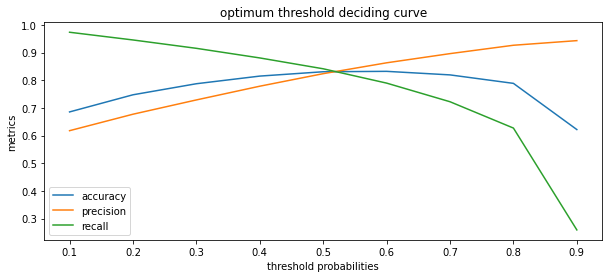

In [87]:
# plotting accuracy, precision, recall plot
plt.figure(figsize=(10,4))
plt.plot(thresh_prob_list, metric_df['accuracy_score'], label = 'accuracy')
plt.plot(thresh_prob_list, metric_df['precision_score'], label = 'precision')
plt.plot(thresh_prob_list, metric_df['recall_score'], label = 'recall')
plt.title('optimum threshold deciding curve')
plt.xlabel('threshold probabilities')
plt.ylabel('metrics')
plt.legend(loc =0)
plt.show()

- The above depicts the variation in accuracy, precision and recall value for different threshold probability values. We need to consider a optimum threshold probability value such that it meets our business requirement. As per business problem we are required to have high recall value. Upon opting for high recall value there will be decrease in precision value as their always exists tradeoff between precision and recall. Since our aim is to identify all churn customers we aim to have recall value higher than 0.90 compromising slightly in precision value. At the same time not much compromising in precision value as precision value determines how precisely we are able to predict the churn cases. Hence it is necessary to good amount of precision value and higher recall value since we are focusing only for the high value churn customers. Hence we select optimum threshold probability to be 0.3

In [88]:
# checking the confusion matrix
confusion_matrix(y_pred_df['actual_values'], y_pred_df[str(0.3)])

array([[12656,  6536],
       [ 1628, 17565]], dtype=int64)

In [89]:
# checking the performance of the model on train dataset considering 0.3 threshold value
metric_df.iloc[2,:]

accuracy_score    0.78731
precision_score   0.72881
recall_score      0.91518
Name: 0.3, dtype: float64

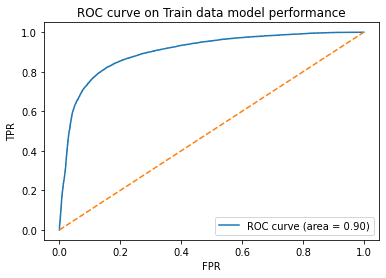

In [90]:
# plotting roc curve to check the model performance on the train data
fpr,tpr,threshold  = roc_curve(y_pred_df['actual_values'], y_pred_df['pred_prob'], drop_intermediate= False)
auc_value = roc_auc_score(y_pred_df['actual_values'], y_pred_df['pred_prob'])
plt.figure()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve on Train data model performance')
plt.plot(fpr,tpr,label = 'ROC curve (area = %0.2f)' % auc_value)
plt.plot([0,1],[0,1], '--')
plt.legend(loc = 0)
plt.show()

- From above ROC curve we can see that the area under curve is 0.90 which is an indication that the model is able to classify the 1's and 0's properly.<br><br>
- Before making predictions using the optimum threshold probability value let's build a sklearn Logistic regression model and check how the model is able to perform on train and cross validated dataset. Checking the performance on the model on cross validated dataset will give better estimate of model on test data.

#### Building Logistic Regression from sklearn with Hyperparameter tuning using RFE and manual feature elimination final features

In [91]:
# defining logistic regression model using sklearn and tuning its hyperparameters
logreg_tune = LogisticRegression(random_state= 100)
# defining the hyperparameter param grid
param_grid = {'penalty': ['none', 'l1', 'l2', 'elasticnet'], 
             'C':[0.1,0.01,1.0,10,100]}
# defining stratified fold
folds = StratifiedKFold(n_splits=5, random_state= 100)
# defining the grid model object
grid_logreg = GridSearchCV(logreg_tune, param_grid= param_grid, cv=folds, n_jobs=-1, verbose=1,
                          return_train_score= True, scoring = 'accuracy')
# fitting the grid model on top of the data
grid_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=False),
             estimator=LogisticRegression(random_state=100), n_jobs=-1,
             param_grid={'C': [0.1, 0.01, 1.0, 10, 100],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [92]:
# checking the grid results in dataframe
grid_logreg_results = pd.DataFrame(grid_logreg.cv_results_)
# checking the head
grid_logreg_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.22899       0.04519          0.01436         0.01147 0.10000   
1        0.01596       0.00463          0.00000         0.00000 0.10000   
2        0.23238       0.03074          0.00997         0.00189 0.10000   
3        0.01775       0.00478          0.00000         0.00000 0.10000   
4        0.20685       0.03998          0.01177         0.00533 0.01000   

  param_penalty                               params  split0_test_score  \
0          none        {'C': 0.1, 'penalty': 'none'}            0.82949   
1            l1          {'C': 0.1, 'penalty': 'l1'}                nan   
2            l2          {'C': 0.1, 'penalty': 'l2'}            0.82988   
3    elasticnet  {'C': 0.1, 'penalty': 'elasticnet'}                nan   
4          none       {'C': 0.01, 'penalty': 'none'}            0.82949   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0            0.83548            0.82610            0.82949            0.83053   
1                nan                nan                nan                nan   
2            0.83548            0.82597            0.82936            0.83066   
3                nan                nan                nan                nan   
4            0.83548            0.82610            0.82949            0.83053   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0          0.83022         0.00303                3             0.83050   
1              nan             nan               18                 nan   
2          0.83027         0.00306                1             0.83047   
3              nan             nan               17                 nan   
4          0.83022         0.00303                3             0.83050   

   split1_train_score  split2_train_score  split3_train_score  \
0             0.82890             0.83190             0.83138   
1                 nan                 nan                 nan   
2             0.82894             0.83210             0.83122   
3                 nan                 nan                 nan   
4             0.82890             0.83190             0.83138   

   split4_train_score  mean_train_score  std_train_score  
0             0.83063           0.83066          0.00102  
1                 nan               nan              nan  
2             0.83053           0.83065          0.00104  
3                 nan               nan              nan  
4             0.83063           0.83066          0.00102

In [93]:
# checking the best estimator and considering it to be logreg_tune model
logreg_tune = grid_logreg.best_estimator_

In [94]:
# making predictions using the logreg_tune model
y_train_pred_sklogreg = logreg_tune.predict(X_train)
# checking the model performance on train data using sklearn logistic regression model
recall_score(y_train,y_train_pred_sklogreg)

0.8411399989579534

#### Checking the Cross validation score before directly making predictions using model on test data.

In [95]:
# defining the Strafied fold
folds = StratifiedKFold(n_splits = 5, random_state =100)
# defining cross val score object
crossval_score = cross_val_score(logreg_tune, X_train_sm, y_train, cv = folds, scoring = 'recall', n_jobs=-1, verbose= 1)
# checking the cross_val_score
np.mean(crossval_score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


0.8409314540261145

- Upon using rfe modelled features followed by manual feature elimination and building logistic regression model using sklearn package on final features and then computing cross validation score. The score turns out to be equally same on comparing which train data recall score. Thus model obtained is a generalized model.
- The reason for consideration cross validation score as it serves as a good estimator of how model using rfe modelled features will be performing on actual test data.<br><br>
- Let's make predictions on test data using statsmodel build logistic regression model considering threshold probability value equal to 0.3

#### Making Predictions on test data using 0.3 as threshold probability

In [96]:
# redefining the features of X_test
X_test = X_test[X_train.columns]
# addding constant to X_test
X_test_sm = sm.add_constant(X_test)
# making preidictions on X_test
y_test_pred = logreg_4.predict(X_test_sm)
# creating a dataframe which contains actual test and predicted probability values of test
test_pred_df = pd.DataFrame(y_test)
test_pred_df.columns = ['actual_values']
test_pred_df['pred_prob'] = y_test_pred
# making class label predictions using considered threshold value
test_pred_df['pred_labels'] = test_pred_df['pred_prob'].apply(lambda x: 1 if x>0.3 else 0)
# checking the head of the dataframe
test_pred_df.head()

actual_values  pred_prob  pred_labels
40059              1    0.85670            1
11897              0    0.00071            0
41906              1    0.52682            1
4373               0    0.09515            0
14561              0    0.36534            1

In [97]:
# checking the metrics for model performance on test data
print('The accuracy score on test data: {}'.format(accuracy_score(test_pred_df['actual_values'], test_pred_df['pred_labels'])))
print('The precision score on test data: {}'.format(precision_score(test_pred_df['actual_values'], test_pred_df['pred_labels'])))
print('The recall score on test data: {}'.format(recall_score(test_pred_df['actual_values'], test_pred_df['pred_labels'])))

The accuracy score on test data: 0.7839037140599355
The precision score on test data: 0.7253861003861004
The recall score on test data: 0.9136778115501519


- From above model performance metrics evaluation we can see that the recall value turns out to be close to 93%. The model turns out to be performing equally better on test data as well which is an indication that we are able to generalize the model.

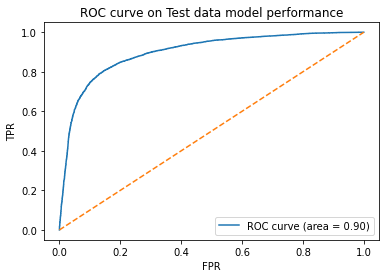

In [98]:
# checking the model performance by plotting ROC curve
fpr,tpr,threshold  = roc_curve(test_pred_df['actual_values'], test_pred_df['pred_prob'], drop_intermediate= False)
auc_value = roc_auc_score(test_pred_df['actual_values'], test_pred_df['pred_prob'])
plt.figure()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve on Test data model performance')
plt.plot(fpr,tpr,label = 'ROC curve (area = %0.2f)' % auc_value)
plt.plot([0,1],[0,1], '--')
plt.legend(loc = 0)
plt.show()

- Upon plotting ROC and analyzing the AUC of roc curve we see that auc value turns out to be same on both train and test data.

- Hence our model has managed to obtain recall value greater than 90% on both train and test data. Let's make some interpretations using the interpretable model which we have built.

## Interpretation from Interpretable model

In [99]:
# checking the summary of model built using statsmodel
logreg_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38385
Model:                            GLM   Df Residuals:                    38372
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15418.
Date:                Mon, 31 Aug 2020   Deviance:                       30836.
Time:                        00:49:44   Pearson chi2:                 6.28e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2617      0.016    -16.320      0.000      -0.293      -0.230
loc_og_t2t_mou_8      -0.2707      0.024    -11.319      0.000      -0.318      -0.224
loc_og_t2m_mou_8      -0.7075      0.032    -21.942      0.000      -0.771      -0.644
std_og_t2t_mou_8      -0.1155      0.018     -6.304      0.000      -0.151      -0.080
total_og_mou_8        -0.3984      0.026    -15.478      0.000      -0.449      -0.348
loc_ic_t2f_mou_8      -0.2523      0.022    -11.489      0.000      -0.295      -0.209
total_ic_mou_8        -0.9142      0.037    -24.683      0.000      -0.987      -0.842
total_rech_num_8      -0.4628      0.019    -24.564      0.000      -0.500      -0.426
last_day_rch_amt_8    -0.5552      0.019    -29.962      0.000      -0.591      -0.519
max_rech_data_8       -0.4107      0.037    -11.143      0.000      -0.483      -0.338
av_rech_amt_data_8    -0.3143      0.039     -8.102      0.000      -0.390      -0.238
arpu_6_7               0.7128      0.019     38.482      0.000       0.676       0.749
loc_ic_t2m_mou_6_7     0.2519      0.024     10.316      0.000       0.204       0.300
======================================================================================
"""

- Upon checking the statistical summary provided by statsmodel and analyzing the coefficients we can say which predictors have provided significant contribution in seperating the two classes of target variable. <br><br>
- Top positive coefficients which upon increase by one unit increases the log odds chances of a customer churing are:
    - arpu_6_7
- Similarly, top negative coefficients which upon decrease by one unit effectively increase the log odds of a customer churning are:
    - total_ic_mou_8
    - loc_og_t2m_mou_8
    - last_day_rch_amt_8
    - total_rech_num_8
    - max_rech_data_8

In [100]:
# computing odds and log odds on predictions made by model using test data
test_pred_df['odds'] = test_pred_df['pred_prob'].apply(lambda x: x/(1-x))
test_pred_df['log_odds'] = test_pred_df['odds'].apply(lambda x: np.log(x))
# checking the head of the dataframe
test_pred_df.head()

actual_values  pred_prob  pred_labels    odds  log_odds
40059              1    0.85670            1 5.97833   1.78814
11897              0    0.00071            0 0.00071  -7.24688
41906              1    0.52682            1 1.11336   0.10738
4373               0    0.09515            0 0.10515  -2.25234
14561              0    0.36534            1 0.57564  -0.55228

- Upon analyzing log odds across each of the customers we can determine how likely is a customer likely to churn. Because log odds is directly proportional to the model equation meaning upon observing the coefficients associated with each of the feature, we can say that 1 unit increase in a feature keeping all other features constant there exists a increase in log odds value by beta times which is nothing but the coefficient associated with that feature.<br><br>
- Let's analyze the features used in model building in relation with target variable to get to know their relation between them.

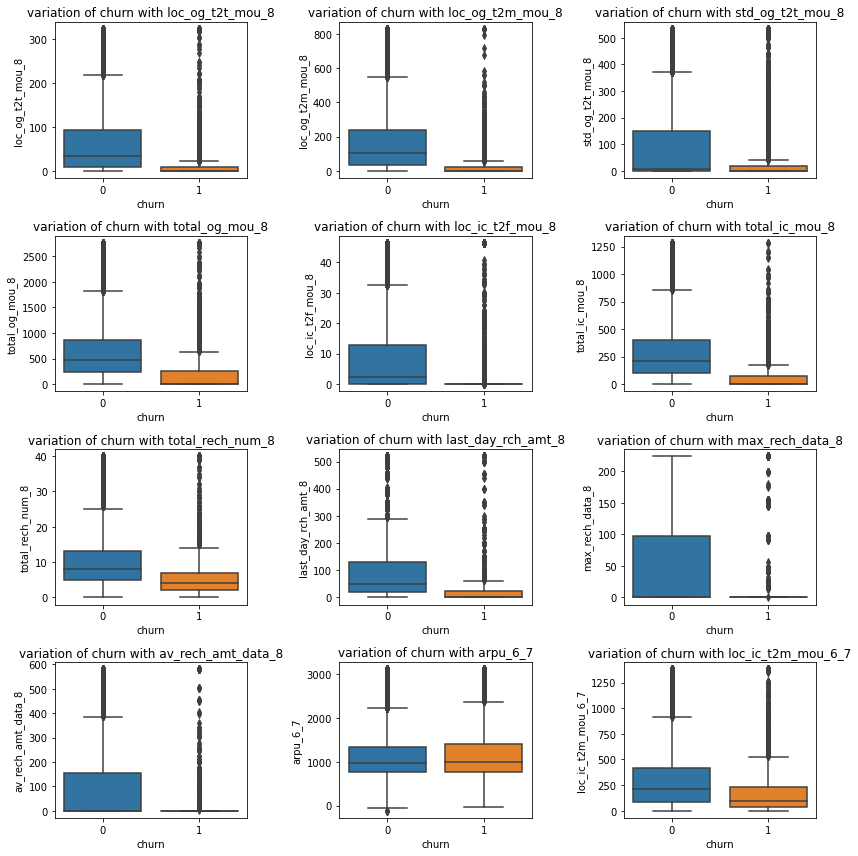

In [101]:
# plotting box plot to visualize the relation between model featrues and target variable
plt.figure(figsize= (12,12))
for index, column in enumerate(list(X_train.columns)):
    plt.subplot(4,3, index+1)
    sns.boxplot(hvc_dataframe['churn'],hvc_dataframe[column])
    plt.title('variation of churn with '+column)
plt.tight_layout()
plt.show()

- Upon visualizing above boxplots we can conclude the same information which we have concluded during EDA that is most of the churn customers are the ones who have utilized the services properly during good phase months and utilized less services during action month which is an strong indication of about to churn behaviour. From all the above plots we can depict the same information.<br><br>
- Specific feature wise interpretations we will plot the relation between features of good phase for the model returned features of 8th month.

In [102]:
# creating a list of good phase month features for the model returned 8th month features
model_features_6_7_list = []
for column in list(X_train.columns):
    if column[-1] == '8':
        model_features_6_7_list.append(column[:len(column)-1]+'6_7')
model_features_6_7_list

['loc_og_t2t_mou_6_7',
 'loc_og_t2m_mou_6_7',
 'std_og_t2t_mou_6_7',
 'total_og_mou_6_7',
 'loc_ic_t2f_mou_6_7',
 'total_ic_mou_6_7',
 'total_rech_num_6_7',
 'last_day_rch_amt_6_7',
 'max_rech_data_6_7',
 'av_rech_amt_data_6_7']

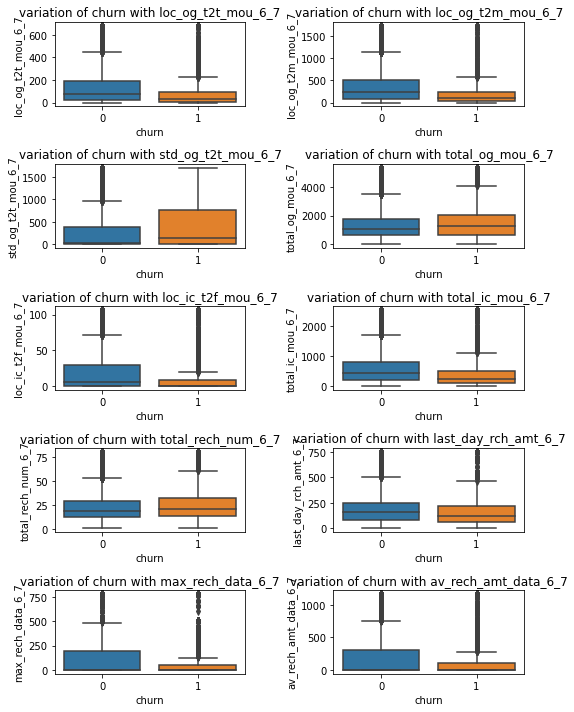

In [103]:
# plotting box plot relation between good phase months features of the model returned features of 8th month
plt.figure(figsize= (8,10))
for index, column in enumerate(model_features_6_7_list):
    plt.subplot(5,2,index+1)
    sns.boxplot(hvc_dataframe['churn'], hvc_dataframe[column])
    plt.title('variation of churn with '+column)
plt.tight_layout()
plt.show()

- Upon comparing the model returned features of 8th month with 6th and 7th months the following interpretations can be made using the median values:
    - Customer whose __local outgoing calls within same telecom network mou__ during good phase months is around 34 mins and in action phase month is close to 0 mins and slightly higher than 0 mins then such customers are likely to churn.
    - Customers having __local outgoing calls with other mobile network mou__ during good phase around 100 mins and in action phase month close to 0 mins or a drastic change in mou the such customers are more likely to churn.
    - Customers having __std outgoing calls within same telecom network mou__ during good phase months around 140 mins and in action phase month close to 0 mins or a drastic change in mou then such customers are likely to churn.
    - Customers having __total outgoing mou__ during good phase around 1200 mins and in action phase around 0 mins or observed a drastic change in mou then such customers are likely to churn.
    - Customers having __local incoming calls from fixed lines mou__ is low in case of both good phase months and action phase month then such customers are likely to churn.
    - Customers having __total incoming calls mou__ during good phase months is around 250 mins and in action phase month close to 0 mins or a drastic change in mou then such customers are likely to churn.
    - Customers having __total number of recharges__ during good phase months around 20 and in action phase month around 4 recharges then such customers are likely to churn.
    - Customers having __last day recharge amount__ combinely for 6th and 7th month around 120 and in action phase month to be 0 or a drastic change in last day recharge amount then such customers are likely to churn.
    - Customers having __max recharge data__ during good phase months is low in both good phase months and action phase month then such customers are likely to churn.
    - Customers having __average recharge amount__ for data during is low in both good phase and action phase then such customers are likely to churn.
    - Customer whose __arpu__ in good phase months is around 1000 and in action phase month is around 100 then such customers are likely to churn in the upocoming days or month.
    - Customers having __local incoming calls from different mobile network mou__ during good phase is around 100 mins and in action phase month around 0 mins or a drastic change in mou then such customers are likely to churn.<br><br>
__Note:__ These are the specific feature interpretations upon comparing good phase and action phase months for model returned features. It is necessary to remember that upon statisfying any single feature criteria a customer cannot be declared to be churned or likely to churn. Upon satisfying all features as per above mentioned conditions then a customer can be declared to be churned or likely to churn.

## Recommendations to manage churn based on interpretable model

- Upon analyzing box plot relationships between features used in modelling and the target variable we come to an inference that the churn customers are the ones which utilized the services well during good phase months and started using comparatively less or nill services during the action phase month i.e. in 8th month. We can specifically focus such customers and provide then with some offers or provide better service in terms of call quality and data speed we can control churning of customers.
- Some specific recommendations can be made upon observation of model returned features and are as follows:
    - Provide some offers to all likely to churn customers like recharge coupons, free trail services, etc.
    - Offering some extra local outgoing t2t and t2m mou.
    - offering some extra std outgoing t2t mou.
    - offering some free data services either 2g or 3g as per previous frequent usage mode.<br><br>

## Higher Performance Model Building

#### performing PCA on train dataset

In [104]:
# defining PCA model object without any hyperparameters
pca = PCA(random_state= 100)
# fitting the model on top of the X_train
pca.fit(X_train_copy)

PCA(random_state=100)

In [105]:
# checking the components which have been resulted upon performing pca 
pca.components_

array([[-1.96331184e-19, -0.00000000e+00,  1.11022302e-16, ...,
        -0.00000000e+00, -0.00000000e+00,  9.26513898e-02],
       [-1.18482621e-19, -0.00000000e+00,  8.32667268e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -1.57488697e-01],
       [ 2.32464225e-19, -0.00000000e+00,  1.24900090e-16, ...,
        -0.00000000e+00, -0.00000000e+00,  1.89755462e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -9.03141937e-17,  2.30642347e-17, ...,
         0.00000000e+00,  0.00000000e+00, -7.26535098e-17],
       [ 9.99999666e-01, -4.64164751e-04,  1.94923382e-04, ...,
        -0.00000000e+00, -0.00000000e+00, -2.71050543e-19]])

In [106]:
# checking the explained variation provided by each of the component
pca.explained_variance_ratio_

array([1.96822335e-01, 1.23553626e-01, 8.50310172e-02, 5.41719830e-02,
       5.20040283e-02, 4.71567534e-02, 4.25175381e-02, 2.80720649e-02,
       2.56318970e-02, 2.17533848e-02, 1.99187580e-02, 1.91475023e-02,
       1.85808535e-02, 1.69293257e-02, 1.56003003e-02, 1.39003616e-02,
       1.34899350e-02, 1.28256521e-02, 1.26161776e-02, 1.19566005e-02,
       1.06080187e-02, 1.01784857e-02, 9.66738944e-03, 9.03866045e-03,
       8.91566167e-03, 8.44811619e-03, 7.97309746e-03, 7.69828365e-03,
       7.51271154e-03, 7.40270928e-03, 6.64689585e-03, 5.52828618e-03,
       5.38886873e-03, 4.82637905e-03, 4.40452632e-03, 4.24994974e-03,
       3.93950281e-03, 3.71130236e-03, 3.60333444e-03, 3.51089448e-03,
       3.33661272e-03, 3.06837623e-03, 2.89546478e-03, 2.60266998e-03,
       2.51176636e-03, 2.29300033e-03, 1.88126476e-03, 1.74825204e-03,
       1.72633719e-03, 1.56248175e-03, 1.41968983e-03, 1.34499372e-03,
       1.16711076e-03, 9.31972963e-04, 9.05721199e-04, 8.64531690e-04,
      

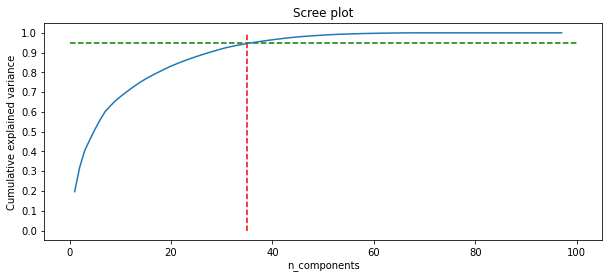

In [107]:
# plotting Scree plot to define n_components
plt.figure(figsize= (10,4))
plt.plot( list(range(1,len(X_train_copy.columns)+1)) ,np.cumsum(pca.explained_variance_ratio_))
plt.hlines(0.95, xmin = 0, xmax=100, colors= 'g', linestyles= '--')
plt.vlines(35, ymin=0, ymax= 1, colors= 'r', linestyles= '--')
plt.title('Scree plot')
plt.xlabel('n_components')
plt.ylabel('Cumulative explained variance')
plt.yticks([i/10 for i in range(0,11)])
plt.show()

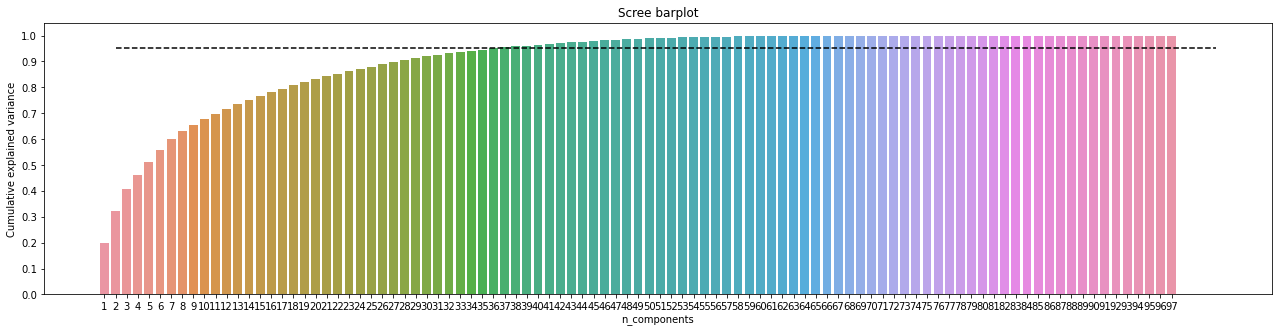

In [108]:
# Plotting scree bar plot for better visualization
plt.figure(figsize= (22,5))
sns.barplot( list(range(1,len(X_train_copy.columns)+1)) ,np.cumsum(pca.explained_variance_ratio_))
plt.hlines(0.95, xmin=1, xmax=100, linestyles='--')
plt.title('Scree barplot')
plt.xlabel('n_components')
plt.ylabel('Cumulative explained variance')
plt.yticks([i/10 for i in range(0,11)])
plt.show()

- From above Scree plot we can see that about 35~36 components captures 95% of the variance present in the data. To better visualize a horizontal line has been plot across 0.95. Let's proceed with considering n_components =35 and build PCA again defining 35 as the compoenets.

In [109]:
# defining pca after deriving n_components from scree plot
pca_tune = PCA(n_components= 35, random_state= 100)
# fitting and transforming on the train data set
X_train_pca = pca_tune.fit_transform(X_train_copy)

In [110]:
# checking X_train_pca and y_train_copy shapes
X_train_pca.shape, y_train_copy.shape

((38385, 35), (38385,))

- Upon performing fit and transform using pca build model object we can now see that the shape of the train dataset have been changed and also the training datapoints have been transformed on to the new axis by performing change of axis method. We know that PCA results in uncorrelated, independent, orthogonal basis vectors which explains maximum variance in that direction. Let's see whether is there any correlation between the resulted principal components using correlation plot.

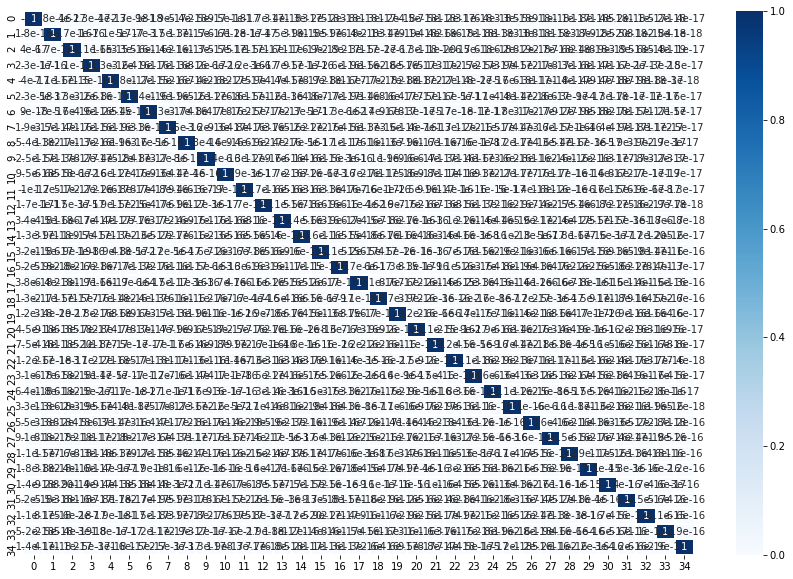

In [111]:
# plotting correlation plot to check the uncorrelated nature of principal components
corr_mat_pca = np.corrcoef(X_train_pca.transpose())
# plotting using heatmap
plt.figure(figsize= (15,10))
sns.heatmap(corr_mat_pca, annot= True, cmap = 'Blues', linecolor= 'white', linewidths= 1)
plt.show()

- From above plot we can clearly see that the principal components which are resulted by PCA are truly uncorrelated, independent and orthogonal basis vectors.

In [112]:
# Transforming X_test data as well
X_test_pca = pca_tune.transform(X_test_copy)

- So far we have obtained principal components which explains 95% of the variance present in the data and also transformed X_train and X_test data as well. Now let's proceed building high performance model building.

#### 1) Building Decision Tree with hyperparameter tuning and PCA for high performance 

In [113]:
# Defining the model object
dt_pca_model = DecisionTreeClassifier(random_state =100)
# defining the param grid for hyperparameter tuning
param_grid = {'criterion': ['gini', 'entropy'],'max_depth': [5,10,15,20],
              'min_samples_leaf': [50,100,200,300,400,500], 'min_samples_split': [100,300,500,700,900]}
# defining Stratified folds
folds = StratifiedKFold(n_splits = 5, random_state = 100)
# defining grid model object
grid_pca_dt = GridSearchCV(dt_pca_model, param_grid= param_grid, n_jobs=-1, verbose=1,cv= folds,
                       scoring='accuracy', return_train_score= True)
# fitting the data on top of the model object
grid_pca_dt.fit(X_train_pca, y_train_copy)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  7.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=100), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [50, 100, 200, 300, 400, 500],
                         'min_samples_split': [100, 300, 500, 700, 900]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [114]:
# checking the results of gridseasrch
grid_pca_dt_results_df = pd.DataFrame(grid_pca_dt.cv_results_)
# checking the head
grid_pca_dt_results_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.94081       0.18859          0.00718         0.00213   
1        1.94560       0.31601          0.00638         0.00135   
2        1.65797       0.06081          0.01297         0.01497   
3        1.72080       0.02422          0.00658         0.00102   
4        1.91368       0.06180          0.00898         0.00414   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               5                     50   
1            gini               5                     50   
2            gini               5                     50   
3            gini               5                     50   
4            gini               5                     50   

  param_min_samples_split                                             params  \
0                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
1                     300  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
2                     500  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
3                     700  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
4                     900  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0            0.80565            0.80813            0.80722            0.81334   
1            0.80526            0.80813            0.80722            0.81438   
2            0.80435            0.80787            0.80709            0.81438   
3            0.80435            0.80422            0.80657            0.81165   
4            0.80357            0.80422            0.80657            0.81125   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0            0.81217          0.80930         0.00295              152   
1            0.81217          0.80943         0.00335              151   
2            0.81217          0.80917         0.00362              157   
3            0.80774          0.80690         0.00272              206   
4            0.80774          0.80667         0.00275              208   

   split0_train_score  split1_train_score  split2_train_score  \
0             0.81643             0.81526             0.81650   
1             0.81594             0.81526             0.81650   
2             0.81500             0.81516             0.81637   
3             0.81500             0.81223             0.81298   
4             0.81396             0.81223             0.81298   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0             0.81686             0.81288           0.81559          0.00145  
1             0.81676             0.81236           0.81536          0.00159  
2             0.81676             0.81236           0.81513          0.00154  
3             0.81278             0.80871           0.81234          0.00204  
4             0.81106             0.80871           0.81179          0.00181

In [115]:
# checking the best parameter combination
grid_pca_dt.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [116]:
# making predictions using best estimator on train data
dt_pca_best = grid_pca_dt.best_estimator_
y_train_pred_pca_dt = dt_pca_best.predict(X_train_pca)

In [117]:
# checking the model performance on train data using metrics
print('The accuracy on train data {}'.format(accuracy_score(y_train_copy, y_train_pred_pca_dt)))
print('The precision on train data {}'.format(precision_score(y_train_copy, y_train_pred_pca_dt)))
print('The recall on train data {}'.format(recall_score(y_train_copy, y_train_pred_pca_dt)))

The accuracy on train data 0.8661977334896444
The precision on train data 0.8702913439755545
The recall on train data 0.8606783723232428


- From above we can see that Precision, Recall and Accuracy values all tunrn out to be nearly same. Let's check cross validation score before checking the model performance on test data directly as cross validation score will be best estimate to know how the model will be performing on test data. If model turns out to be performing poor on cross validation set then it is an indication that model has overfitted on train dataset. Further tuning of hyperparameter would help to build the model more in generalized manner so that it could be performing equally well on test data as well.

In [118]:
# defining stratified folds
folds = StratifiedKFold(n_splits=5, random_state=100)
# defining cross val score object
crossval_score_pca_dt = cross_val_score(dt_pca_best, X_train_pca, y_train_copy,cv=folds,
                                    n_jobs=-1,verbose=1,scoring= 'recall')
# considering the average of all 5 fold recall value
np.mean(crossval_score_pca_dt)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.3s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished


0.8347836533012373

- From above we can see that the model performance on cross validation set is also considerably better and comparable with the performance of the model on train data which is an indication that the model has been well generalized and not overfitted. Upon further hyperparameter tuning even better results can be obtained. Let's now check the model performance on test data.

In [119]:
# checking model performance on test data
y_test_pred_pca_dt = dt_pca_best.predict(X_test_pca)

In [120]:
# checking the model performance on test data using metrics
print('The accuracy score on test data: {}'.format(accuracy_score(y_test_copy, y_test_pred_pca_dt)))
print('The precision score on test data: {}'.format(precision_score(y_test_copy, y_test_pred_pca_dt)))
print('The recall score on test data: {}'.format(recall_score(y_test_copy, y_test_pred_pca_dt)))

The accuracy score on test data: 0.838125341924503
The precision score on test data: 0.839063643013899
The recall score on test data: 0.8367173252279635


- From above metric results we can see that the model performance on test data is very much similar to the model performance results on train data. All the three metrics values are close to each other. Hence the model which we have built considering single decision tree is generalized and free from any overfitting issues. We can further enhance the performance of the model upon fine tuning of hyperparameters or by building other extreme high performance models like Random Forests, Gradient Boosting or Xgboosting methods. Before building other high performance models let's check the feature importances provided by single decision tree though these features importances. But the feature importanaces provided by Random Forests can be considered to be reliable as those feature importances have been provided upon generalizing feature importances from many estimators used within Random forests.

In [121]:
# printing classification report 
print(classification_report(y_test_copy, y_test_pred_pca_dt))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      8226
           1       0.84      0.84      0.84      8225

    accuracy                           0.84     16451
   macro avg       0.84      0.84      0.84     16451
weighted avg       0.84      0.84      0.84     16451



In [122]:
# defining the feature names for principal components
name_list = ['PC']*35
numbers_list = [str(i) for i in range(1,36)]
pc_list = list(map(lambda x,y: x+y, name_list, numbers_list))

In [123]:
# checking the feature importances provided by decision trees
feature_imp_dt_df = pd.DataFrame()
feature_imp_dt_df['features'] = pc_list
feature_imp_dt_df['feature_importance'] = dt_pca_best.feature_importances_
feature_imp_dt_df.sort_values('feature_importance', ascending =False, inplace=True)
# checking top 10 features which provided significant contribution in seprating the classes of target column
feature_imp_dt_df.head(10)

features  feature_importance
0       PC1             0.55295
4       PC5             0.11004
3       PC4             0.09238
5       PC6             0.03014
6       PC7             0.02839
33     PC34             0.01576
14     PC15             0.01387
1       PC2             0.01151
13     PC14             0.01097
23     PC24             0.01070

- From above we can look at the top 10 principal components which have provided significant contribution in seprating the class labels associated with target column.

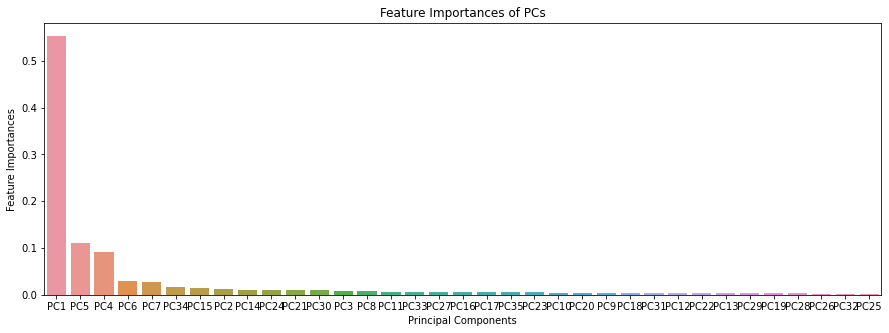

In [124]:
# plotting feature importances
plt.figure(figsize= (15,5))
sns.barplot(feature_imp_dt_df['features'], feature_imp_dt_df['feature_importance'])
plt.title('Feature Importances of PCs')
plt.xlabel('Principal Components')
plt.ylabel('Feature Importances')
plt.show()

- From above feature importances plot we can see that top 3 principal components provide significant contribution in classifying the class labels associated with target variable.

- Let's build another high performance model i.e. Random Forests with hyperparameter tuning

#### 2) Building Random Forests with hyperparameter tuning using principal components for high performance

- The process of building random forests is it a collection of many decision trees as a result obtained will be far more better as average will be computed as the prediction. Taking the complexity of data into consideration we consider the best hyperparameters tuned for building a single decision tree and we further tune some addition hyperparameter for better performance of random forests.

In [125]:
# defining model object
rf_pca_model = RandomForestClassifier(random_state = 100, n_estimators= 200, criterion= 'gini')
# defining param grid
param_grid = {'max_features': [3,4,5],'max_depth': [10,20], 'min_samples_leaf': [5,10]}
# defining Stratified folds
folds = StratifiedKFold(n_splits =5, random_state=100)
# defining grid model object
grid_rf_pca_model = GridSearchCV(rf_pca_model, param_grid= param_grid, n_jobs=-1, verbose=1,
                            cv = folds, scoring = 'accuracy',return_train_score= True)
# fitting the data on top of the model object
grid_rf_pca_model.fit(X_train_pca, y_train_copy)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  7.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=False),
             estimator=RandomForestClassifier(n_estimators=200,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'max_features': [3, 4, 5],
                         'min_samples_leaf': [5, 10]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [126]:
# checking the grid results in dataframe
grid_rf_pca_results_df = pd.DataFrame(grid_rf_pca_model.cv_results_)
# checking the head of the dataframe
grid_rf_pca_results_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       38.10306       1.12076          0.40369         0.04355   
1       37.74282       1.30760          0.42068         0.04577   
2       46.33471       0.31963          0.42147         0.03815   
3       45.83525       0.20289          0.44441         0.05388   
4       56.97087       1.39792          0.39494         0.00546   

  param_max_depth param_max_features param_min_samples_leaf  \
0              10                  3                      5   
1              10                  3                     10   
2              10                  4                      5   
3              10                  4                     10   
4              10                  5                      5   

                                              params  split0_test_score  \
0  {'max_depth': 10, 'max_features': 3, 'min_samp...            0.86688   
1  {'max_depth': 10, 'max_features': 3, 'min_samp...            0.85919   
2  {'max_depth': 10, 'max_features': 4, 'min_samp...            0.86648   
3  {'max_depth': 10, 'max_features': 4, 'min_samp...            0.86258   
4  {'max_depth': 10, 'max_features': 5, 'min_samp...            0.86974   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0            0.86492            0.85971            0.87065            0.86740   
1            0.86232            0.85724            0.86505            0.86570   
2            0.87365            0.86049            0.87261            0.86909   
3            0.86779            0.85724            0.86805            0.86596   
4            0.87339            0.86440            0.87677            0.87196   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0          0.86591         0.00361               10             0.89400   
1          0.86190         0.00328               12             0.88443   
2          0.86846         0.00473                8             0.89527   
3          0.86432         0.00405               11             0.88593   
4          0.87125         0.00412                7             0.89983   

   split1_train_score  split2_train_score  split3_train_score  \
0             0.88807             0.89009             0.89127   
1             0.88254             0.88557             0.88326   
2             0.89521             0.89648             0.89700   
3             0.88658             0.88768             0.88729   
4             0.89801             0.90094             0.90097   

   split4_train_score  mean_train_score  std_train_score  
0             0.89169           0.89103          0.00195  
1             0.88537           0.88423          0.00118  
2             0.89436           0.89566          0.00095  
3             0.88778           0.88705          0.00070  
4             0.89928           0.89980          0.00111

In [127]:
# checking the best estimator
rf_pca_best = grid_rf_pca_model.best_estimator_
rf_pca_best

RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=5,
                       n_estimators=200, random_state=100)

In [128]:
# making predictions using best estimator resulted by gridsearch on train data
train_pred_rf_pca = rf_pca_best.predict(X_train_pca)

In [129]:
# checking the model performance on train data using metrics
print('The accuracy of rf model on train data : {}'.format(accuracy_score(y_train_copy, train_pred_rf_pca)))
print('The precision of rf model on train data : {}'.format(precision_score(y_train_copy, train_pred_rf_pca)))
print('The recall of rf model on train data : {}'.format(recall_score(y_train_copy, train_pred_rf_pca)))
print('The F1 score of rf model on train data : {}'.format(f1_score(y_train_copy, train_pred_rf_pca)))

The accuracy of rf model on train data : 0.974182623420607
The precision of rf model on train data : 0.9618859114900528
The recall of rf model on train data : 0.9874954410462148
The F1 score of rf model on train data : 0.9745224567447361


- From above metrics we can see that the model performance was really good on train data and also all the metric values turns out to be very close to each. Further better results can be achieved upon fine tuning of decision trees. Taking into consideration of data complexity and available resources, we have managed to have optimum model performance in prespective of business requirement.

- Before checking the model performance directly on test dataset let's check the cross validation score of model performance for recall parameter which is our required metric to be improved. Upon cross validation score of the model it will give us best estimate of how the model will be performing on test data.

In [130]:
# defining Stratified folds
folds = StratifiedKFold(n_splits= 5, random_state= 100)
# defining cross validation object
crossval_score_rf_pca = cross_val_score(rf_pca_best, X_train_pca, y_train_copy, 
                                    cv=folds, n_jobs=-1, verbose=1, scoring= 'recall')
# computing the mean recall score
np.mean(crossval_score_rf_pca)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.0min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished


0.9075707329442038

- As per above cross validation score we can see that the model has managed to performance equally better on test cross validation dataset as well. Let's check the model performance on test dataset.

In [131]:
# making predictions on test data using rf_pca_model
test_pred_rf_pca = rf_pca_best.predict(X_test_pca)

In [132]:
# checking the model performance using metrics
print('The accuracy score using rf model on test data: {}'.format(accuracy_score(y_test_copy, test_pred_rf_pca)))
print('The precision score using rf model on test data: {}'.format(precision_score(y_test_copy, test_pred_rf_pca)))
print('The recall score using rf model on test data: {}'.format(recall_score(y_test_copy, test_pred_rf_pca)))
print('The F1-score score using rf model on test data: {}'.format(f1_score(y_test_copy, test_pred_rf_pca)))

The accuracy score using rf model on test data: 0.9204303689745305
The precision score using rf model on test data: 0.9212962962962963
The recall score using rf model on test data: 0.9193920972644377
The F1-score score using rf model on test data: 0.9203432118298546


- From above metric values we can see that the model is performing equally well on both train and test data which is an indication that model built is a generalized model. The model performance can be further increased upon fine hyperparameter tuning but due to lack of resources limiting the hyperparameter tuning of random forests model by considering hyperparameters tuned from decision tree and performing extended hyperparameter tuning.

In [133]:
# printing classification report of model performance on test data
print(classification_report(y_test_copy, test_pred_rf_pca))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      8226
           1       0.92      0.92      0.92      8225

    accuracy                           0.92     16451
   macro avg       0.92      0.92      0.92     16451
weighted avg       0.92      0.92      0.92     16451



In [134]:
# checking the feature importances provided random forests
feature_imp_rf_df = pd.DataFrame()
feature_imp_rf_df['features'] = pc_list
feature_imp_rf_df['feature_importance'] = rf_pca_best.feature_importances_
feature_imp_rf_df.sort_values('feature_importance', ascending =False, inplace=True)
# checking top 10 features which provided significant contribution in seprating the classes of target column
feature_imp_rf_df.head(10)

features  feature_importance
0       PC1             0.23182
4       PC5             0.10120
3       PC4             0.06242
5       PC6             0.03221
2       PC3             0.03122
16     PC17             0.02982
12     PC13             0.02789
32     PC33             0.02762
6       PC7             0.02747
9      PC10             0.02391

- From above we can see that the top 10 principal components which have provided significant contribution in classifying the class labels present in the target variable.

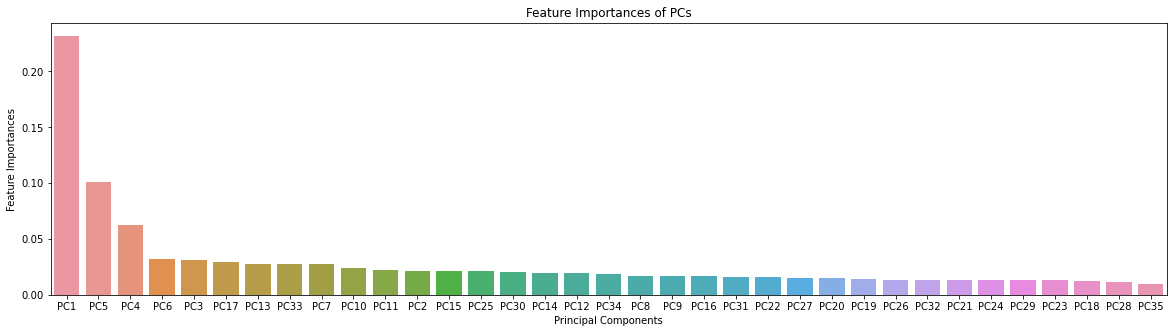

In [135]:
# plotting feature importances
plt.figure(figsize= (20,5))
sns.barplot(feature_imp_rf_df['features'], feature_imp_rf_df['feature_importance'])
plt.title('Feature Importances of PCs')
plt.xlabel('Principal Components')
plt.ylabel('Feature Importances')
plt.show()

- From above we can see that top 3 PC's are specifically significant in classifying the class labels present in target variable.

- Let's proceed further build another high performance model using boosting methods i.e. XG boosting

#### 3) Building XG boost model based on tree based algorithm by hyperparameter tuning using PC

In [136]:
# defining the model object
xgb_pca_model = XGBClassifier(n_estimators = 200, max_depth=3 ,random_state =100)
# defining the param grid
param_grid = {'learning_rate': [0.1,0.2,0.4,0.7],
             'subsample':[0.3,0.6,0.9]}
# defining Stratified folds
folds = StratifiedKFold(n_splits= 5, random_state= 100)
# defining grid model object
grid_xgb_pca_model = GridSearchCV(xgb_pca_model, param_grid= param_grid, n_jobs=-1, verbose=1,
                                 cv= folds, scoring= 'accuracy', return_train_score= True)
# fitting the model on transfored X_train_pca
grid_xgb_pca_model.fit(X_train_pca, y_train_copy)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  6.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=3, min_child_weight=None,
                                     missing...e_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=100,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
         

In [137]:
# checking the results of grid search in dataframe
grid_xgb_pca_results_df = pd.DataFrame(grid_xgb_pca_model.cv_results_)
# checking the head
grid_xgb_pca_results_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       33.95042       0.83343          0.12507         0.01106   
1       50.22710       0.94379          0.10971         0.00844   
2       56.28231       0.75766          0.10632         0.00376   
3       30.05983       1.20066          0.13005         0.03000   
4       46.67321       1.16078          0.11031         0.00293   

  param_learning_rate param_subsample  \
0             0.10000         0.30000   
1             0.10000         0.60000   
2             0.10000         0.90000   
3             0.20000         0.30000   
4             0.20000         0.60000   

                                     params  split0_test_score  \
0  {'learning_rate': 0.1, 'subsample': 0.3}            0.87013   
1  {'learning_rate': 0.1, 'subsample': 0.6}            0.86909   
2  {'learning_rate': 0.1, 'subsample': 0.9}            0.86935   
3  {'learning_rate': 0.2, 'subsample': 0.3}            0.88837   
4  {'learning_rate': 0.2, 'subsample': 0.6}            0.88511   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0            0.87182            0.87156            0.87521            0.87026   
1            0.87143            0.87091            0.87417            0.87052   
2            0.87078            0.86701            0.87196            0.86831   
3            0.89006            0.88615            0.89566            0.89058   
4            0.89293            0.88550            0.89644            0.89188   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0          0.87180         0.00184               10             0.88466   
1          0.87123         0.00167               11             0.88498   
2          0.86948         0.00175               12             0.88342   
3          0.89017         0.00315                7             0.90960   
4          0.89037         0.00441                6             0.91103   

   split1_train_score  split2_train_score  split3_train_score  \
0             0.88309             0.88609             0.88518   
1             0.88524             0.88472             0.88492   
2             0.88413             0.88400             0.88299   
3             0.90931             0.91120             0.90771   
4             0.91159             0.91094             0.91224   

   split4_train_score  mean_train_score  std_train_score  
0             0.88576           0.88496          0.00105  
1             0.88472           0.88492          0.00019  
2             0.88410           0.88373          0.00045  
3             0.91237           0.91004          0.00161  
4             0.91377           0.91191          0.00104

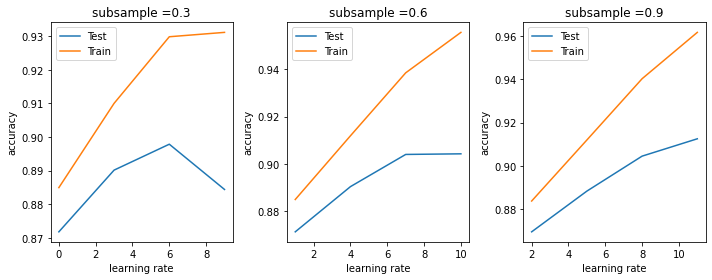

In [138]:
# plotting validation curve to loose for right subsample and right learning rate
plt.figure(figsize= (10,4))
for index, subsample in enumerate([0.3,0.6,0.9]):
    plt.subplot(1,3, index+1)
    plt.plot(grid_xgb_pca_results_df.loc[grid_xgb_pca_results_df['param_subsample'] == subsample,:]['mean_test_score'], label = 'Test')
    plt.plot(grid_xgb_pca_results_df.loc[grid_xgb_pca_results_df['param_subsample'] == subsample,:]['mean_train_score'], label = 'Train')
    plt.legend(loc= 0)
    plt.title('subsample ='+str(subsample))
    plt.xlabel('learning rate')
    plt.ylabel('accuracy')
plt.tight_layout()
plt.show()

- The performance of all the models turns out to be same nearly. Let's go with the best estimator provided by gridsearch cv method.

In [139]:
# considering the best estimator as the final model
xgb_pca_best = grid_xgb_pca_model.best_estimator_
xgb_pca_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [140]:
# making predictions on train data using model
train_pred_xgb_pca = xgb_pca_best.predict(X_train_pca)

In [141]:
# analyzing the performance of the model on train data using metrics
print(classification_report(y_train_copy, train_pred_xgb_pca))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     19192
           1       0.95      0.97      0.96     19193

    accuracy                           0.96     38385
   macro avg       0.96      0.96      0.96     38385
weighted avg       0.96      0.96      0.96     38385



- From above classification report we can see that the model has performed extremely well on train data. Before checking the model performance on test data let's check cross validation score as it serves as a better estimate for model performance on test data. If tunrs out to be poor accordingly further hyperparameter tuning can be performed.

In [142]:
# checking cross validation score
folds =  StratifiedKFold(n_splits= 5, random_state =100)
# defining cross val score object
crossval_score_xgb_pca = cross_val_score(xgb_pca_best, X_train_pca, y_train_copy,cv= folds, 
                                        n_jobs=-1, verbose=1, scoring= 'recall')
# computing the mean of cross validation score
np.mean(crossval_score_xgb_pca)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   41.5s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   41.8s finished


0.9263795464149039

- From above cross validation score we can see that the model performance on validation set tunrs out be extremely good. Let's now check the model performance directly on test data itself.

In [143]:
# making predictions on test data
test_pred_xgb_pca = xgb_pca_best.predict(X_test_pca)

In [144]:
# checking roc_auc_score using model on test data
roc_auc_score(y_test_copy, xgb_pca_best.predict_proba(X_test_pca)[:,1])

0.9653578726212462

- From above AUC of ROC value we can see that the model performance is good and the model is able to classify churn and non churn cases well.

In [145]:
# checking the performance of the model on test data
print(classification_report(y_test_copy, test_pred_xgb_pca))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      8226
           1       0.90      0.93      0.91      8225

    accuracy                           0.91     16451
   macro avg       0.91      0.91      0.91     16451
weighted avg       0.91      0.91      0.91     16451



- From above classification report we can see that the model performance on test data as well is equally good  by obatining a recall value of 0.93, which is a good indication that model built is a generalized model and free from overfitting issues. It would be the case when building model using XGB as the learning algorithm takes care of overfitting of model by performing regualrization and uses second order minimization techniques of cost function hence the model performance is fast. Further performance of the model can be enhanced upon fine tuning of hyperparameters. Let's now look at the feature importances of principal components.

In [146]:
# checking the feature importances
feature_imp_xgb_df = pd.DataFrame()
feature_imp_xgb_df['features'] = pc_list
feature_imp_xgb_df['feature_importance'] = xgb_pca_best.feature_importances_
feature_imp_xgb_df.sort_values('feature_importance', ascending =False, inplace=True)
# checking top 10 features which provided significant contribution in seprating the classes of target column
feature_imp_xgb_df.head(10)

features  feature_importance
0       PC1             0.23312
4       PC5             0.07910
3       PC4             0.06422
5       PC6             0.03470
26     PC27             0.02649
6       PC7             0.02647
13     PC14             0.02479
16     PC17             0.02451
32     PC33             0.02423
12     PC13             0.02297

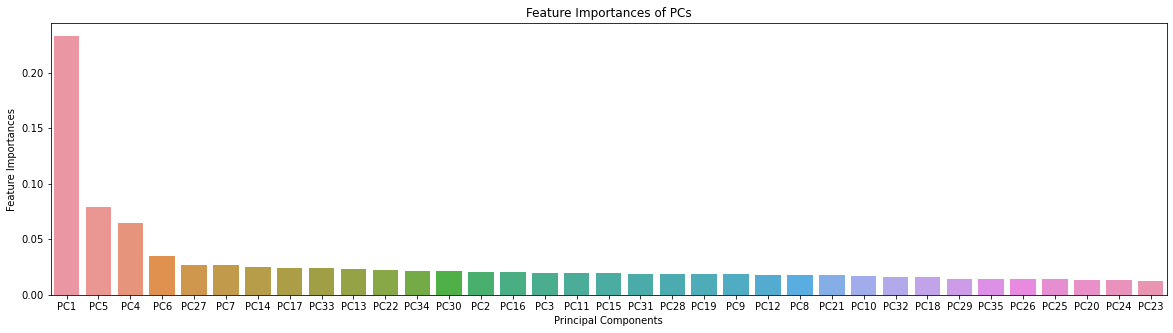

In [147]:
# plotting features importances in barplot
plt.figure(figsize= (20,5))
sns.barplot(feature_imp_xgb_df['features'], feature_imp_xgb_df['feature_importance'])
plt.title('Feature Importances of PCs')
plt.xlabel('Principal Components')
plt.ylabel('Feature Importances')
plt.show()

- From above we feature importances bar plot we can see that top 5 principal components have specifically provided significant contribution in classifying the class labels of target variable.

### Consolidated performance of all high performance models on test data

In [148]:
high_perf_models = [dt_pca_best, rf_pca_best, xgb_pca_best]
accuracy_score_list = [round(accuracy_score(y_test_copy, model.predict(X_test_pca)),2) for model in high_perf_models]
precision_score_list = [round(precision_score(y_test_copy, model.predict(X_test_pca)),2) for model in high_perf_models]
recall_score_list = [round(recall_score(y_test_copy, model.predict(X_test_pca)),2) for model in high_perf_models]
F1_score_list = [round(f1_score(y_test_copy, model.predict(X_test_pca)),2) for model in high_perf_models]
# creating a dataframe
high_pref_df = pd.DataFrame()
high_pref_df['accuracy_score'] = accuracy_score_list
high_pref_df['precision_score'] = precision_score_list
high_pref_df['recall_score'] = recall_score_list
high_pref_df['f1_score'] = F1_score_list
# changing the index
high_pref_df.index = ['Decision Tree', 'Random Forests', 'XGB']
# sorting the dataframe as per recall score as that is the business requirement
high_pref_df.sort_values('recall_score', ascending= False, inplace = True)
# checking the dataframe
high_pref_df

accuracy_score  precision_score  recall_score  f1_score
XGB                    0.91000          0.90000       0.93000   0.91000
Random Forests         0.92000          0.92000       0.92000   0.92000
Decision Tree          0.84000          0.84000       0.84000   0.84000

<Figure size 720x288 with 0 Axes>

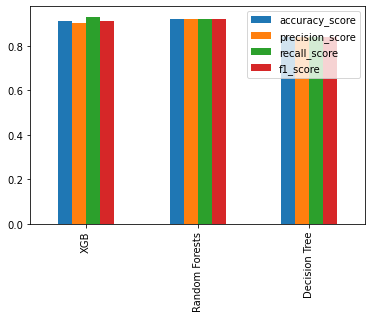

In [149]:
# plotting the results in barplot
plt.figure(figsize= (10,4))
high_pref_df.plot.bar()
plt.legend(loc = 0)
plt.show()

- From above visual plot we can see that XG boosting algorithm has outperformed all other algorithms in terms of recall value. Otherwise Random Forests turns out to be having consistent performance for all metrics. Since we need to predict the churn of high value customers we need to have high recall value.<br><br>

- Upon further fine tuning of hyperparameters we can achieve better results.

## Conclusion 
__XG boosting algorithm__  turns to be the best high performance model and is suitable for deployment purpose. Coming to interpretable model __Logistic Regression model__ can be considered using which we can make inferences about the population consdiering the coefficient or the model parameters resulted upon the model building. We can have interpretation in terms of log odds in relation with the linear combination of features using __Logistic Regression__.